### **Mục lục**
##### [**1. Giới thiệu**](#01)
##### [**2. Mục tiêu**](#02)
##### [**3. Thực hành**](#03)
* [Tiền xử lý](#3.1)
* [Khám phá dữ liệu (EDA)](#3.2)
##### [**4. Kết luận**](#04)


<a id="01"><h3><strong>1. Giới thiệu</strong></h3></a>


Mục này nằm trong chương 3 thuộc bài tập cuối kỳ bộ môn Khai phá dữ liệu lớp DDU1231. Thực hiện với bộ dữ liệu đặt phòng khách sạn (Hotel Booking Demand) dữ liệu được thu thập trong giai đoạn năm 2015 - 2017 từ hai khách sạn một là từ khách sạn thành phố và một khách sạn nghỉ dưỡng cả hai đều nằm ở Bồ Đào Nha

* Sinh viên thực hiện: **Nguyễn Đăng Tiến (3123580050)**
* Nhật ký thực hiện các chương
  * Chương 1: Thực hiện ngày 14/12/2025
  * Chương 2: Thực hiện ngày 14/12/2025
  * Chương 3: Thực hiện ngày 16/12/2025
  * Chương 4: Thực hiện ngày 16/12/2025

<a id="02"><h3><strong>2. Mục tiêu</strong></h3></a>


Thực hiện giải quyết các câu hỏi đặt ra trong bài tiểu luận:
* **Khám phá dữ liệu (EDA)**
  1. Xu hướng đặt phòng thay đổi như thế nào theo thời gian và mùa vụ?
  2. Những phân khúc khách hàng nào có tỷ lệ hủy phòng cao hoặc hành vi đặt phòng đặc thù?
  3. Loại phòng hoặc dịch vụ nào được đặt phổ biến nhất trong từng giai đoạn?
  4.	Những yếu tố nào ảnh hưởng đến biến động giá phòng và tỷ lệ hủy phòng?


<a id="03"><h3><strong>3. Thực hành</strong></h3></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
df.shape

(119390, 32)

<a id="3.1"><h4><strong>3.1. Tiền xử lý</strong></h4></a>

#### **Mô tả các đặc trưng của bộ dữ liệu Hotel Booking Demand**
* **Đặc trưng về loại khách sạn**
  * `hotel` : Loại khách sạn: City Hotel hoặc Resort Hotel.
* **Đặc trưng về thời gian đặt phòng**
  * `is_canceled` : 1 = đặt phòng bị hủy, 0 = không hủy.
  * `lead_time` : Số ngày từ lúc đặt phòng đến ngày check-in.
  * `arrival_date_year` : Năm nhận phòng.
  * `arrival_date_month` : Tháng nhận phòng (January, February...).
  * `arrival_date_week_number` : Tuần trong năm (1–52).
  * `arrival_date_day_of_month` : Ngày trong tháng (1–31).
  * `stays_in_weekend_nights` : Số đêm lưu trú vào thứ 6–7.
  * `stays_in_week_nights` : Số đêm lưu trú vào các ngày trong tuần (Mon–Thu).
* **Đặc trưng về khách hàng**
  * `adults` : Số lượng người lớn.
  * `children` : Số lượng trẻ em.
  * `babies` : Số trẻ sơ sinh.
  * `meal` : Loại suất ăn (BB, HB, FB, SC…).
  * `country` : Quốc gia của khách (mã ISO).
  * `market_segment` : Phân khúc khách hàng (Online TA, Direct, Corporate…).
  * `distribution_channel` : Kênh phân phối (Direct, TA/TO…).
  * `is_repeated_guest` : 1 = khách quay lại, 0 = khách mới.
  * `previous_cancellations` : Số lần đặt trước đó bị hủy.
  * `previous_bookings_not_canceled` : Số đặt trước đó không bị hủy.
  * `reserved_room_type` : Loại phòng khách đặt.
  * `assigned_room_type` : Loại phòng được giao khi nhận phòng.
* **Đặc trưng về tài chính và giá phòng**
  * `booking_changes` : Số lần khách thay đổi đặt phòng.
  * `deposit_type` : Loại đặt cọc (No Deposit, Non Refund, Refundable).
  * `agent` : ID đại lý du lịch.
  * `company` : ID công ty (nếu đi theo đoàn công ty).
  * `adr` : Average Daily Rate: giá phòng trung bình mỗi đêm.
* **Đặc trưng về điều kiện đặt phòng**
  * `required_car_parking_spaces` : Số chỗ đỗ xe khách yêu cầu.
  * `total_of_special_requests` : Số yêu cầu đặc biệt (giường đôi, tầng cao…).
* **Đặc trưng về trạng thái đặt phòng**
  * `reservation_status` : Trạng thái: *Canceled*, *Check-Out*, *No-Show*.
  * `reservation_status_date` : Ngày ghi nhận trạng thái.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# -----------------------------
# 1. Xử lý missing values
# -----------------------------
df['children'].fillna(df['children'].median(), inplace=True) # Thay thế bằng median
df['babies'].fillna(df['babies'].median(), inplace=True) # Thay thế bằng Median
df['country'].fillna(df['country'].mode()[0], inplace=True) # Thay thế bằng Mode

# -----------------------------
# 2. Loại bỏ dữ liệu không hợp lệ
# -----------------------------
df = df[(df['adults'] + df['children'] + df['babies']) > 0] # Loại bỏ phòng không có khách

# -----------------------------
# 3. Outlier Filtering
# -----------------------------
def filter_by_quantile(df, col, low=0.005, high=0.995):
    q_low = df[col].quantile(low)
    q_high = df[col].quantile(high)
    return df[df[col].between(q_low, q_high)]

for col in ['stays_in_week_nights', 'stays_in_weekend_nights',
            'children', 'babies', 'adults']:
    df = filter_by_quantile(df, col)

df = df[df['adr'] >= 0]
df['lead_time'] = df['lead_time'].clip(upper=365)

# -----------------------------
# 4. Feature Engineering
# -----------------------------

# Tổng số ngày lưu trú / tổng số khách
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] # Tổng số đêm ở lại
df['total_guests'] = df['adults'] + df['children'] + df['babies'] # Tổng số khách

# Các biến dự báo mạnh
df['is_family_trip'] = (df['children'] + df['babies'] > 0).astype(int) # Chuyến đi gia đình hay không
df['has_previous'] = (df['previous_cancellations'] > 0).astype(int) # Khách có tiều sử đặt phòng không tốt


# Phân nhóm lead time
df['lead_time_bucket'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 180, 365],
    labels=['0-30', '30-90', '90-180', '180-365'],
    include_lowest=True
)

# Chuyển tháng sang số
df['arrival_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Tạo biến season
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    if month in [3,4,5]: return 'Spring'
    if month in [6,7,8]: return 'Summer'
    return 'Fall'

df['season'] = df['arrival_month_num'].apply(get_season) # Mùa du lịch

# Tạo biến arrival weekday
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)
df['arrival_weekday'] = df['arrival_date'].dt.dayofweek # Ngày trong tháng

# Xóa cột arrival_date vì không dùng cho model
df.drop(['arrival_date'], axis=1, inplace=True)

# -------------------------------
# 5. Loại bỏ cột không cần thiết
# -------------------------------
df.drop([
    'reservation_status', # Tiết lộ trước thông tin khi huấn luyện
    'reservation_status_date',
    'assigned_room_type',
    'company',
    'agent'
], axis=1, inplace=True)

# -----------------------------
# 6. Tách dữ liệu
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách dữ liệu với tỉ lệ train/test 80 - 29
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", num_cols) # Xác định cột số
print("Categorical:", cat_cols) # Xác định cột phân loại

Numeric: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests', 'is_family_trip', 'has_previous']
Categorical: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'lead_time_bucket', 'season']


<a id="3.2"><h4><strong>3.2. Khám phá dữ liệu (EDA)</strong></h4></a>

In [8]:
# Thống kê mô tả
df.describe().T # Biến số

,count,mean,std,min,25%,50%,75%,max
is_canceled,118396.0,0.370148,0.482846,0.0,0.00,0.0,1.0,1.0
lead_time,118396.0,102.043295,100.658214,0.0,18.00,69.0,160.0,365.0
arrival_date_year,118396.0,2016.155993,0.707635,2015.0,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,118396.0,27.182227,13.585673,1.0,16.00,28.0,38.0,53.0
arrival_date_day_of_month,118396.0,15.809951,8.778398,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,118396.0,0.908164,0.940039,0.0,0.00,1.0,2.0,4.0
stays_in_week_nights,118396.0,2.451510,1.702679,0.0,1.00,2.0,3.0,10.0
adults,118396.0,1.858855,0.475208,1.0,2.00,2.0,2.0,3.0
children,118396.0,0.098863,0.383425,0.0,0.00,0.0,0.0,2.0
babies,118396.0,0.007542,0.086520,0.0,0.00,0.0,0.0,1.0


In [9]:
# Thống kê mô tả
df.describe(include='object').T # Biến phân loại

,count,unique,top,freq
hotel,118396,2,City Hotel,78701
arrival_date_month,118396,12,August,13765
meal,118396,5,BB,91631
country,118396,177,PRT,48653
market_segment,118396,8,Online TA,55960
distribution_channel,118396,5,TA/TO,97137
reserved_room_type,118396,9,A,85591
deposit_type,118396,3,No Deposit,103668
customer_type,118396,4,Transient,88874
season,118396,4,Summer,37198


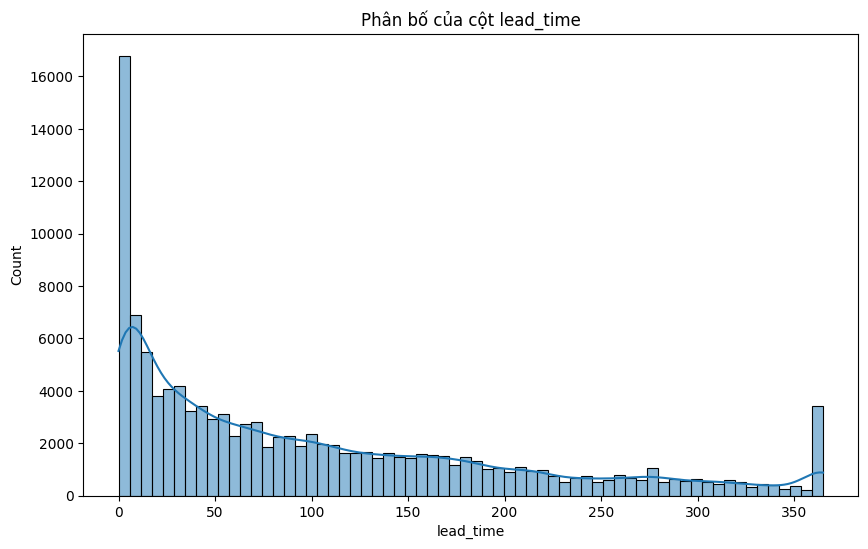

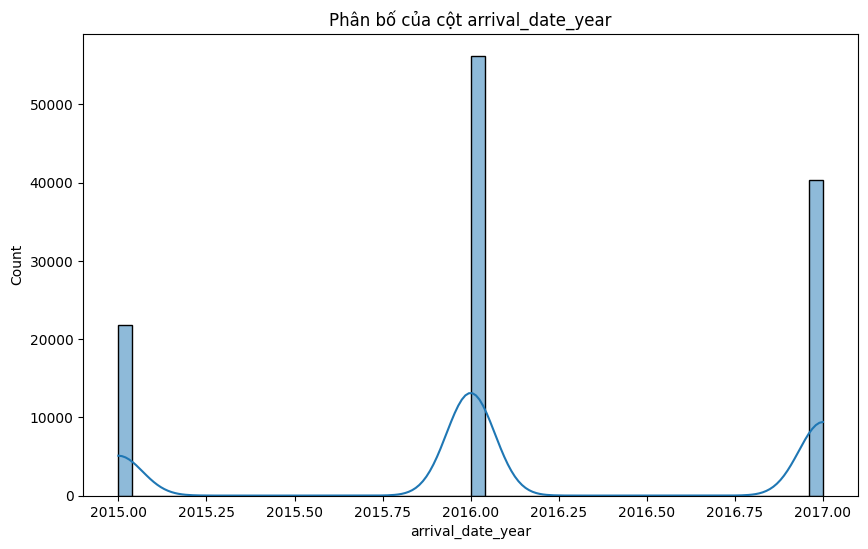

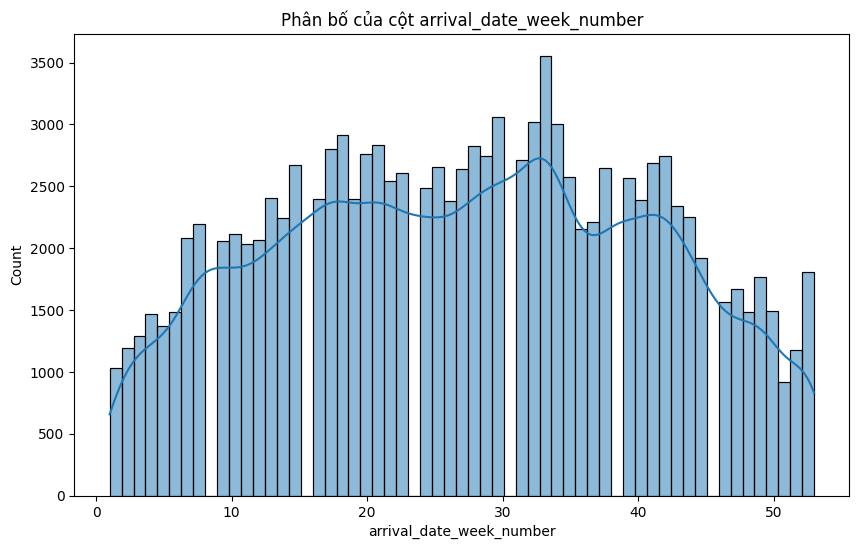

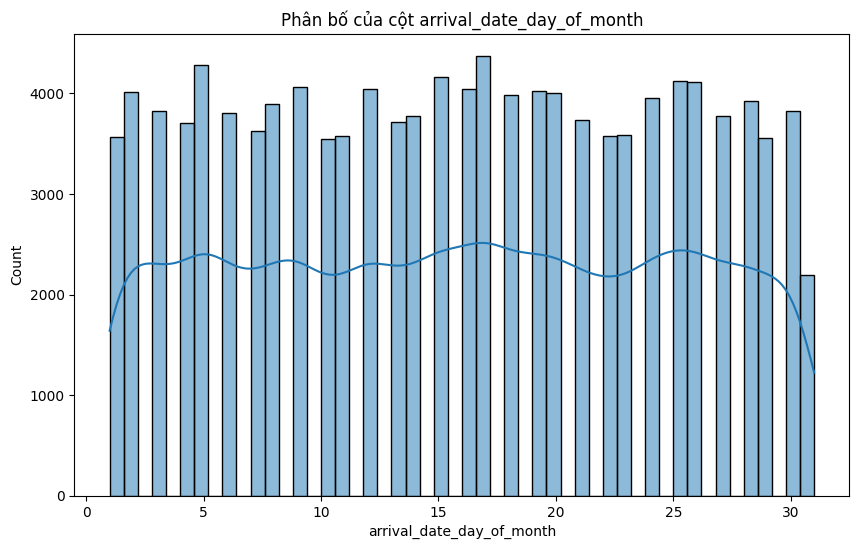

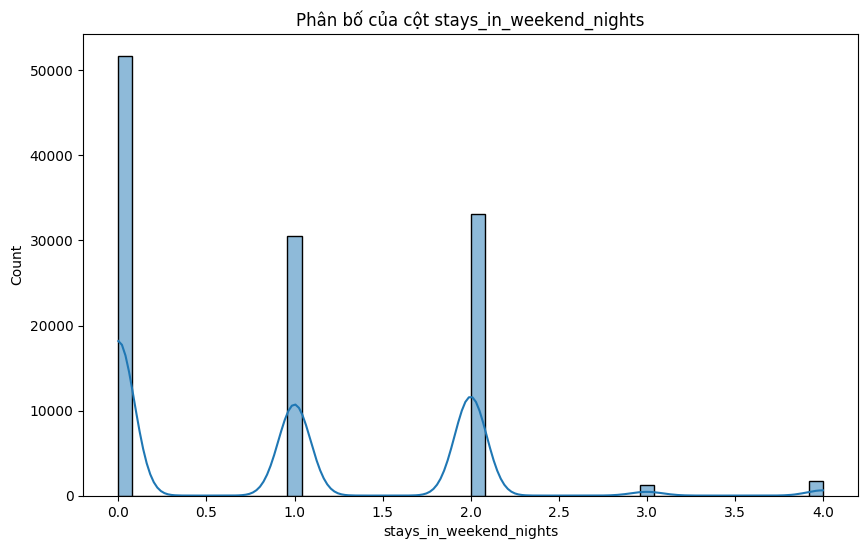

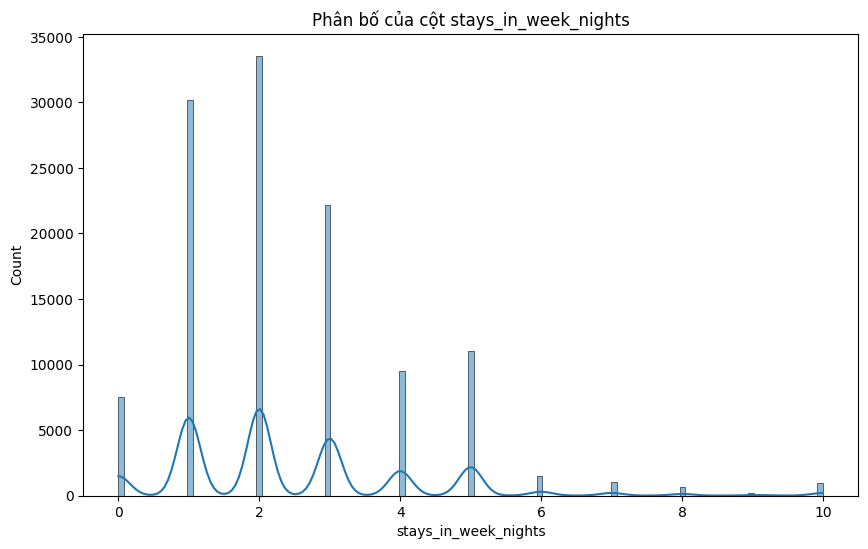

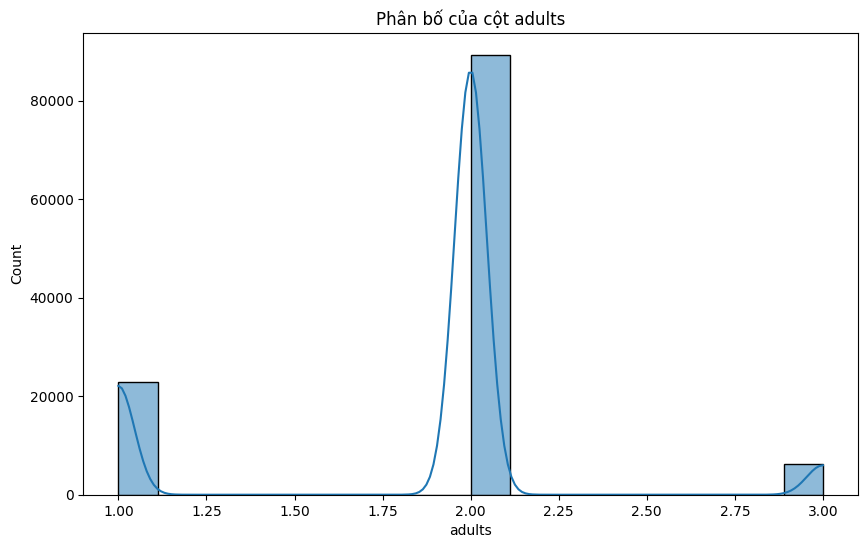

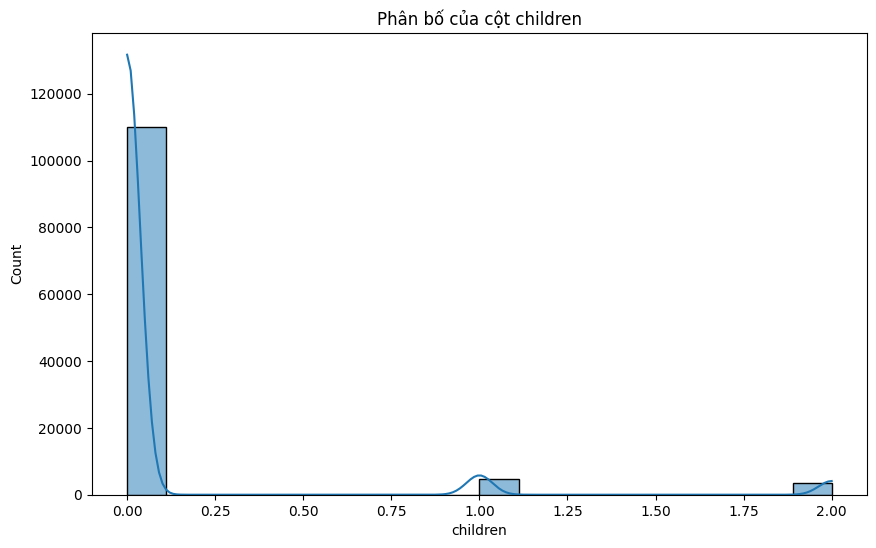

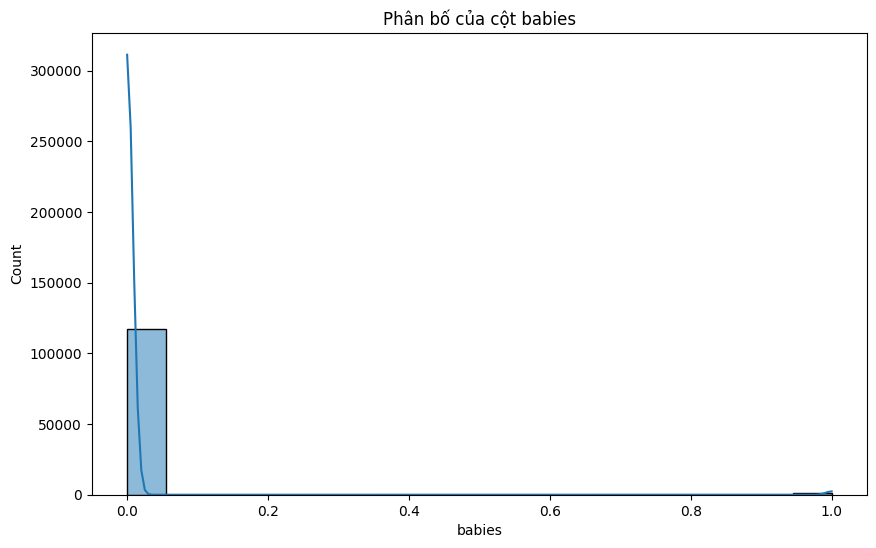

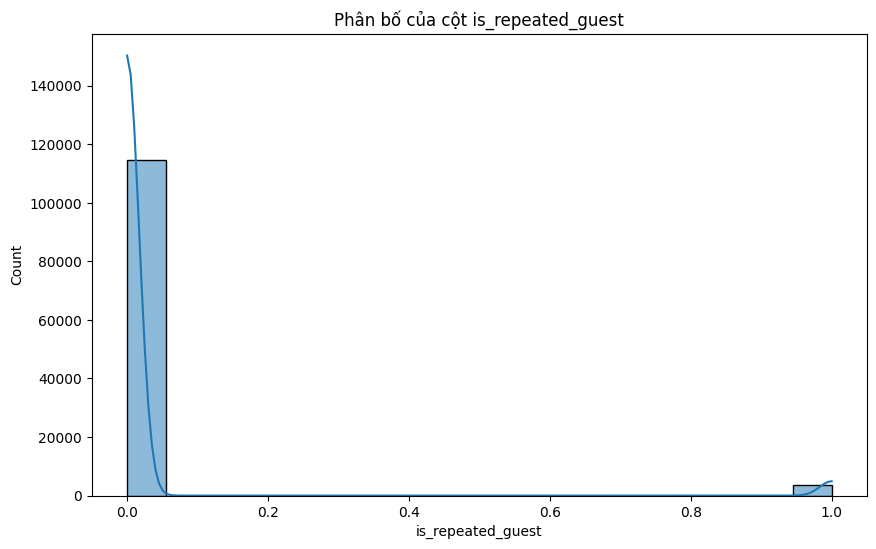

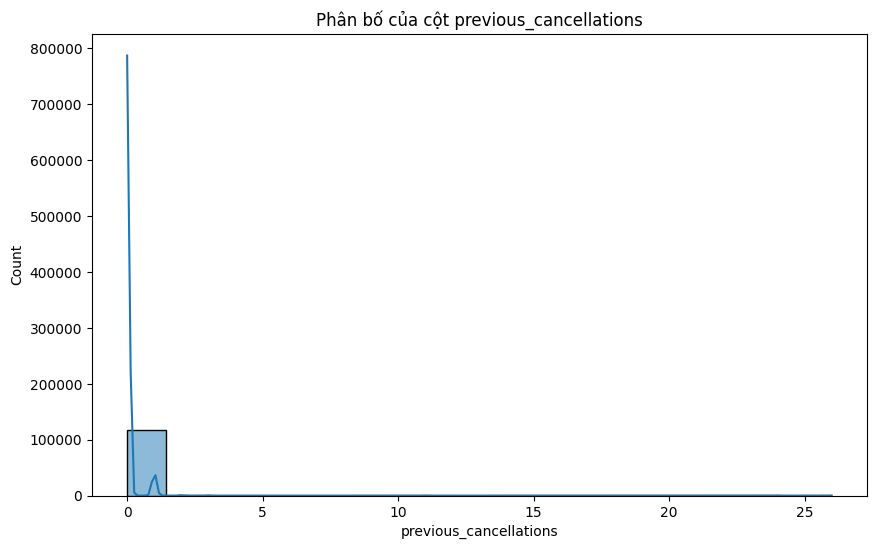

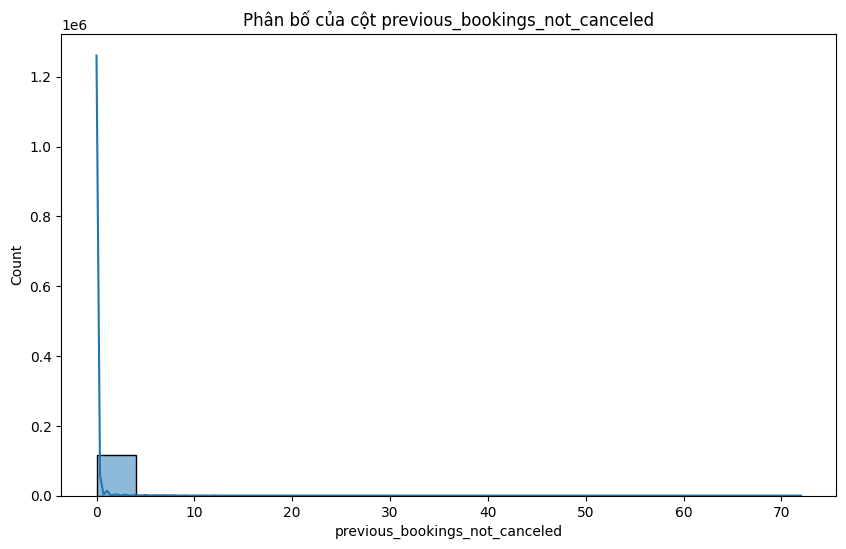

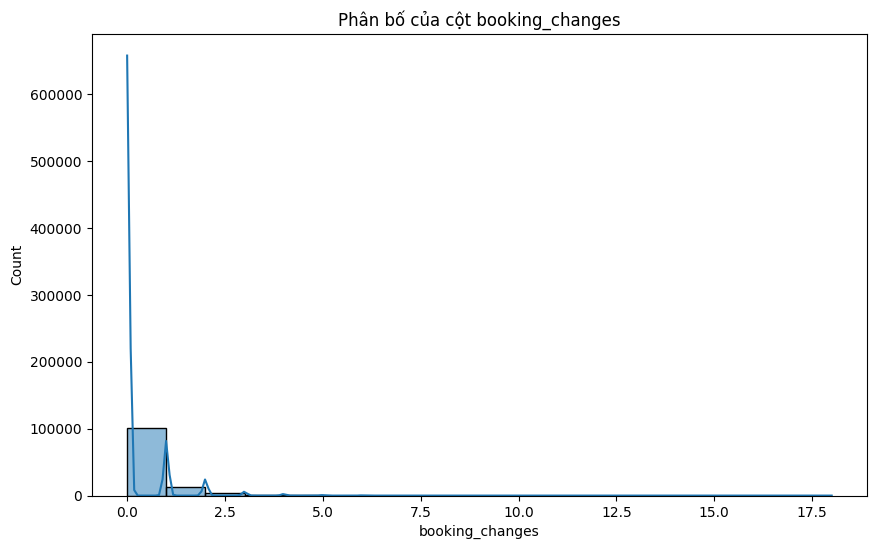

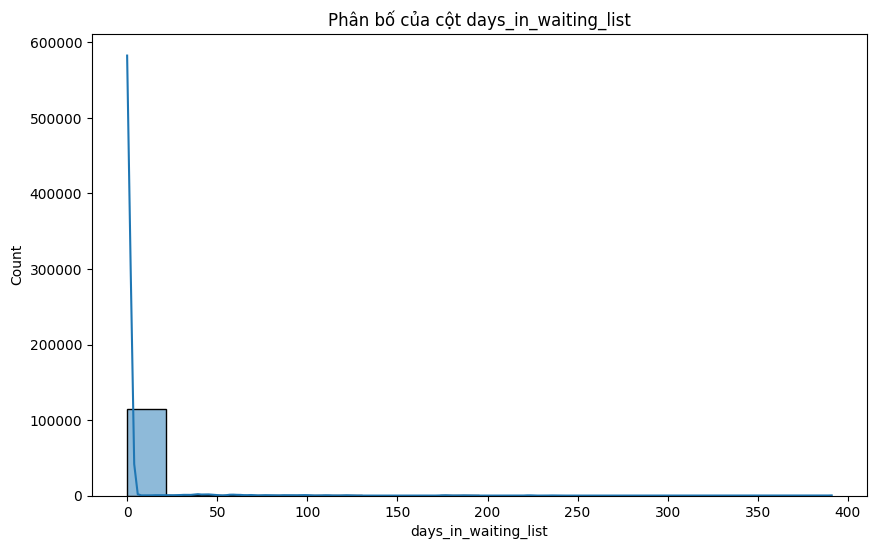

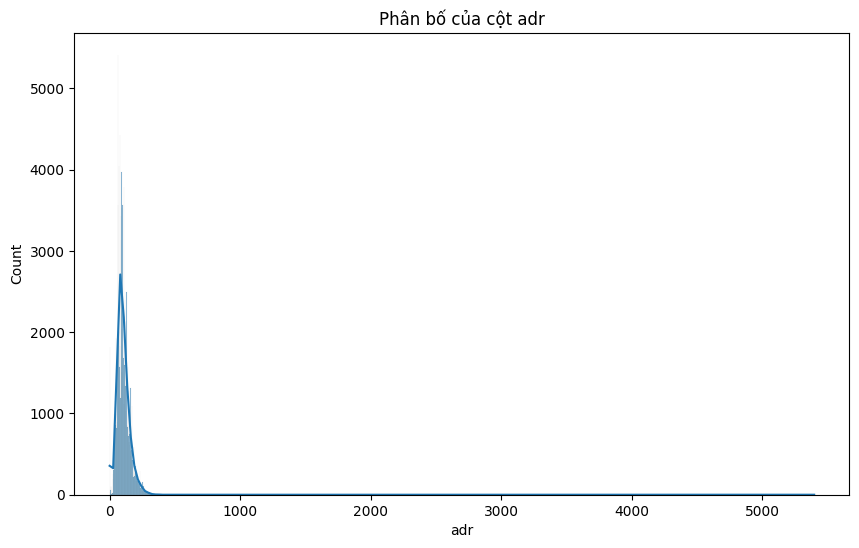

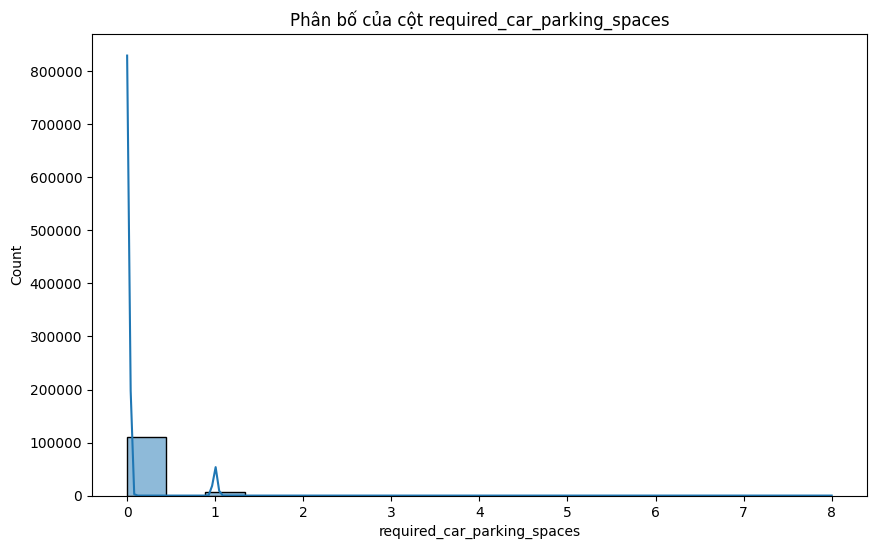

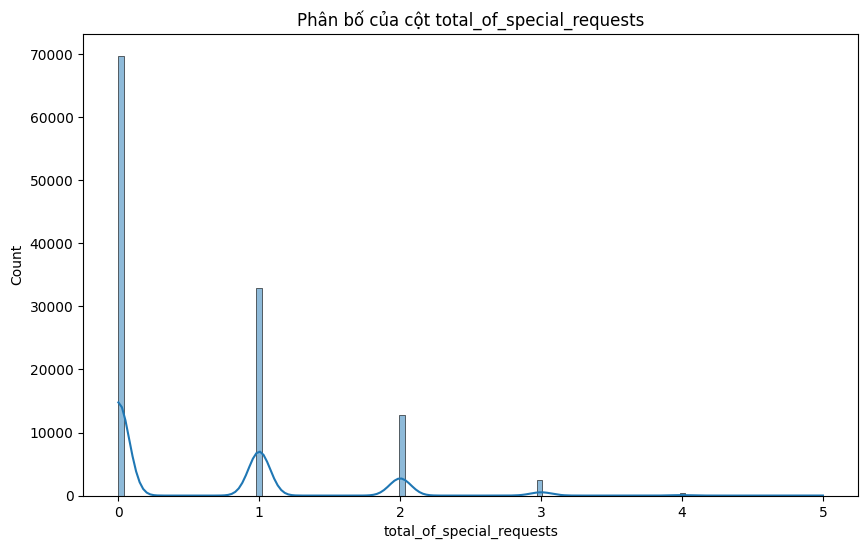

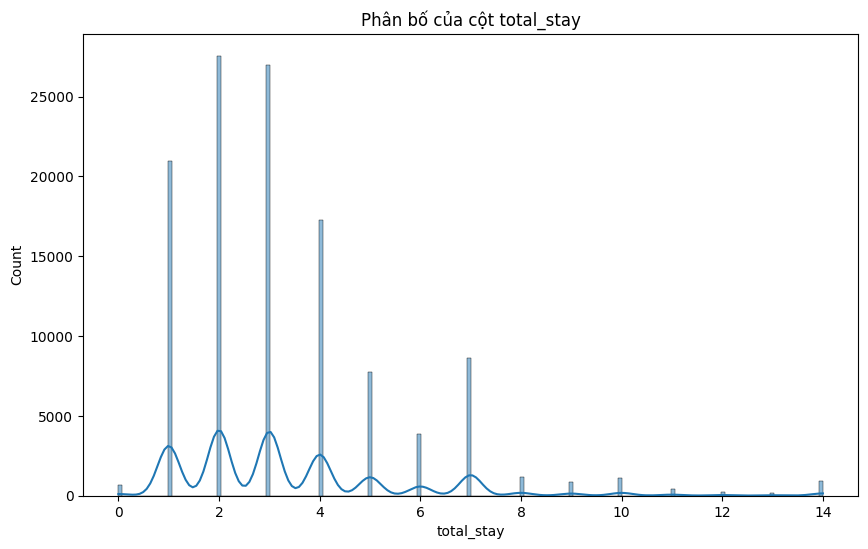

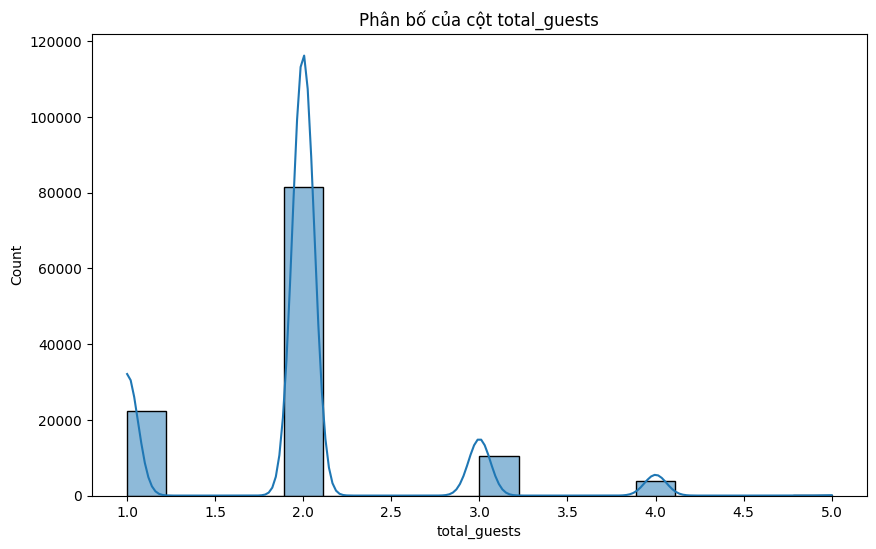

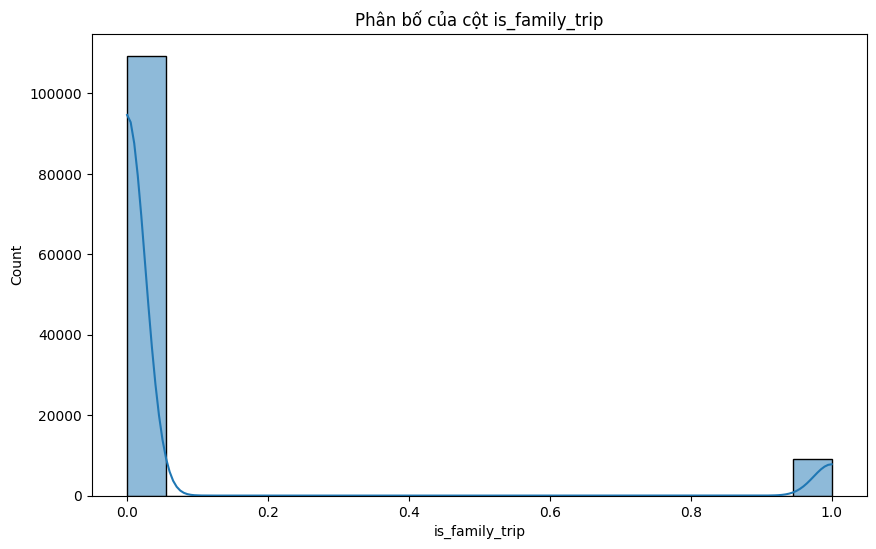

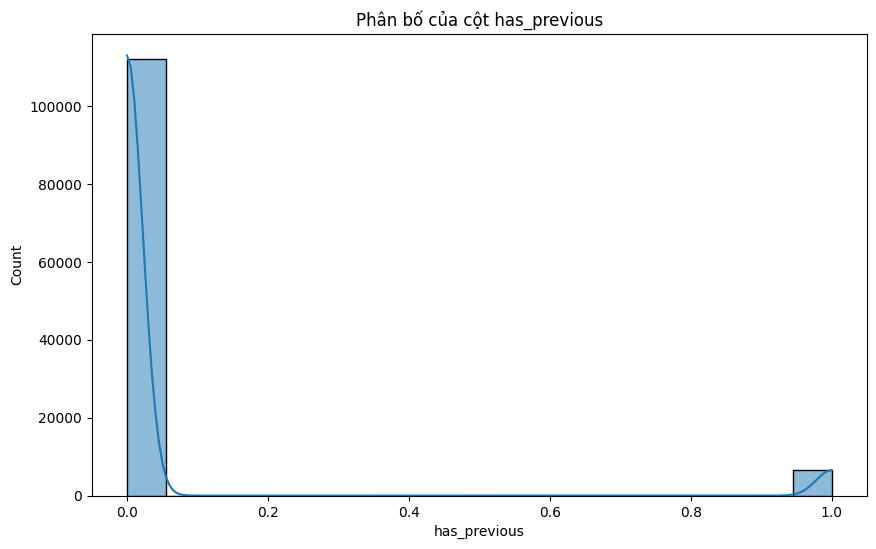

In [10]:
# Vẽ biểu đồ phân bố cho cột số
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Phân bố của cột {col}')
    plt.show()


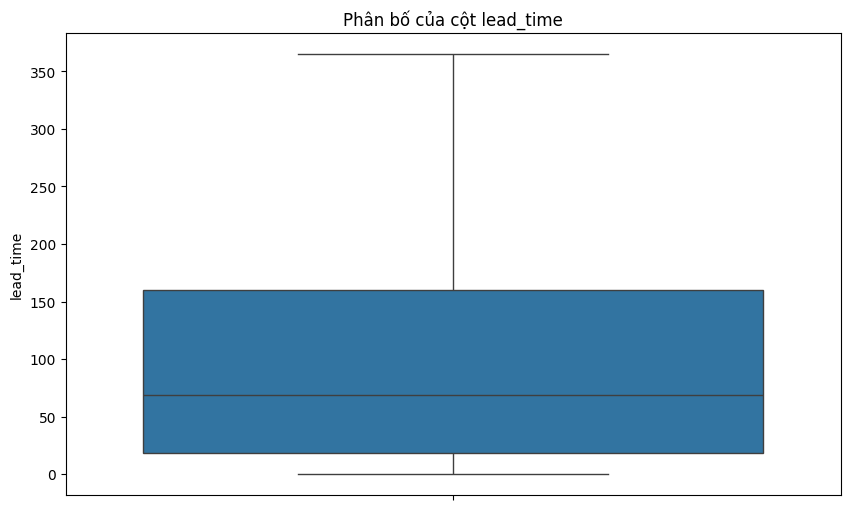

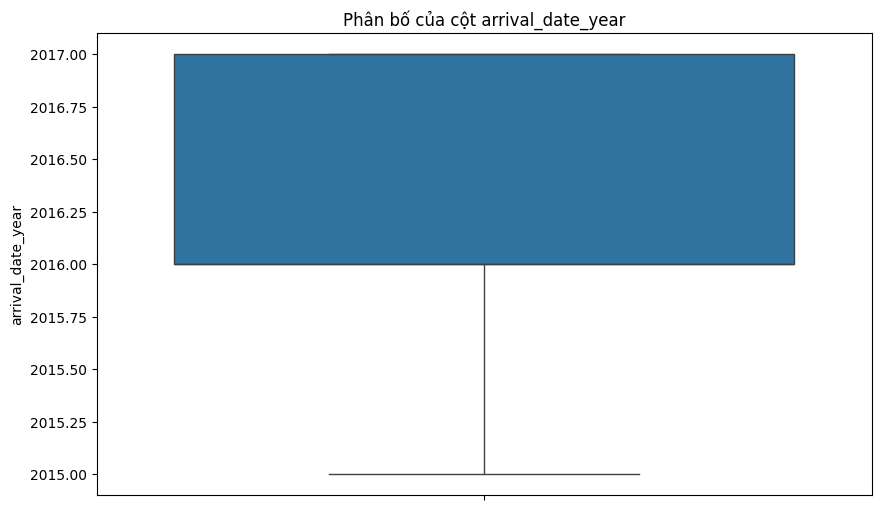

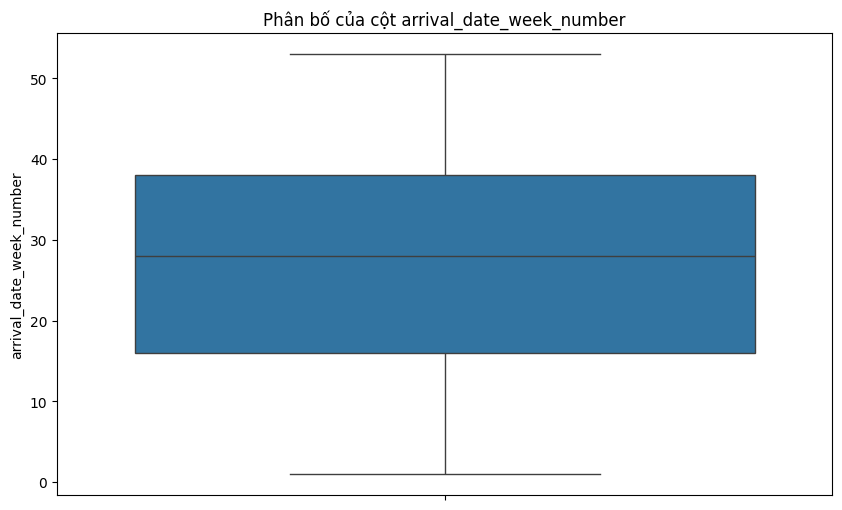

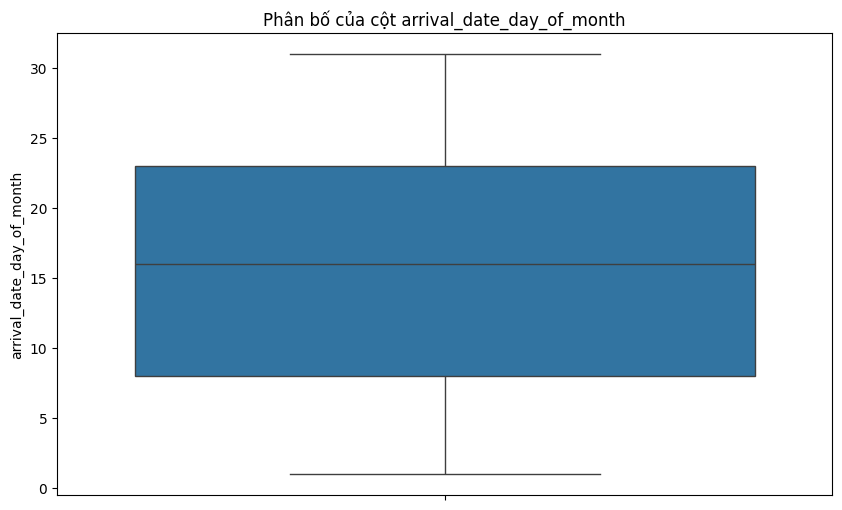

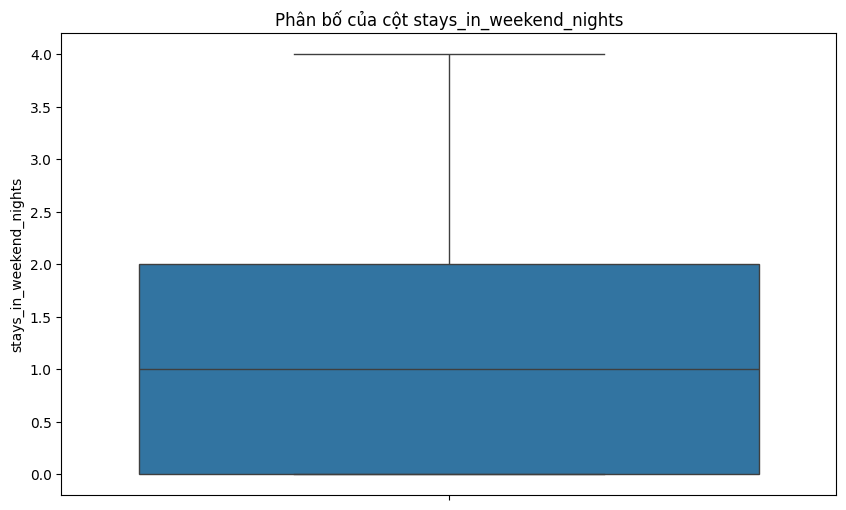

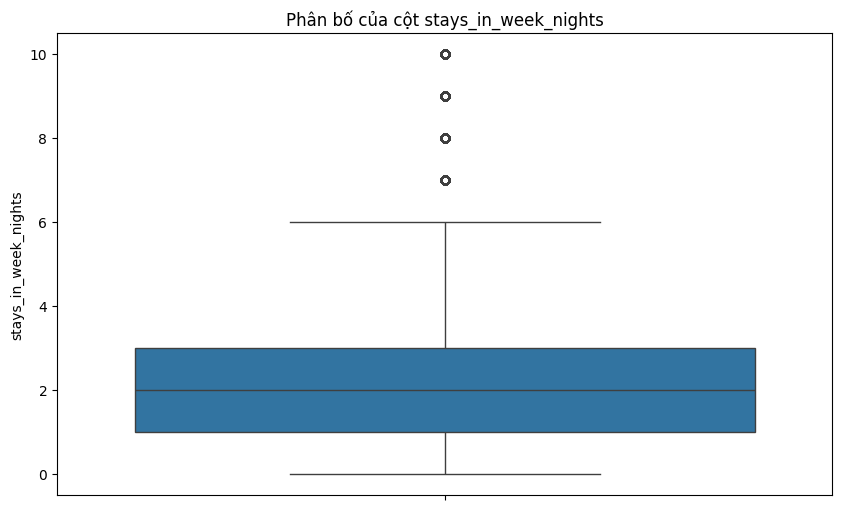

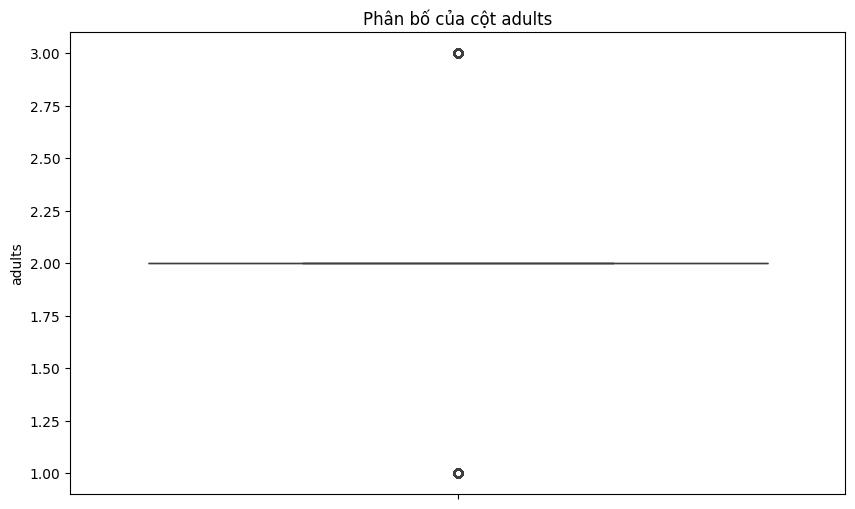

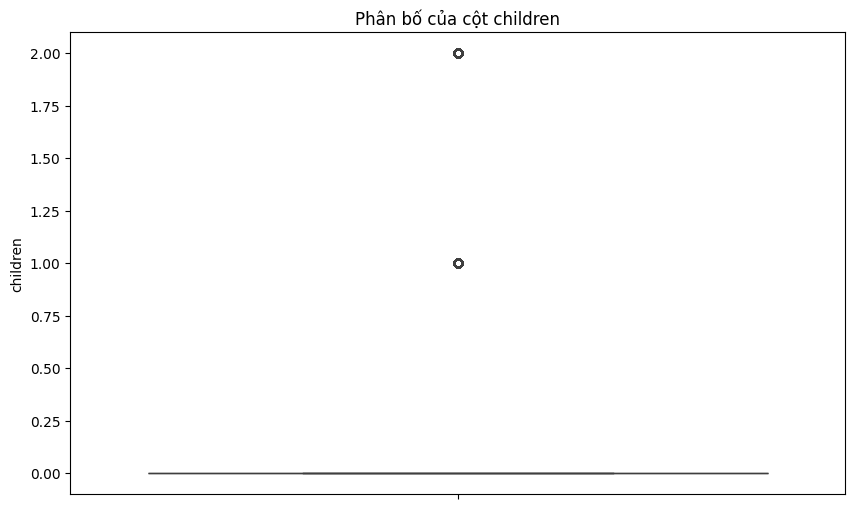

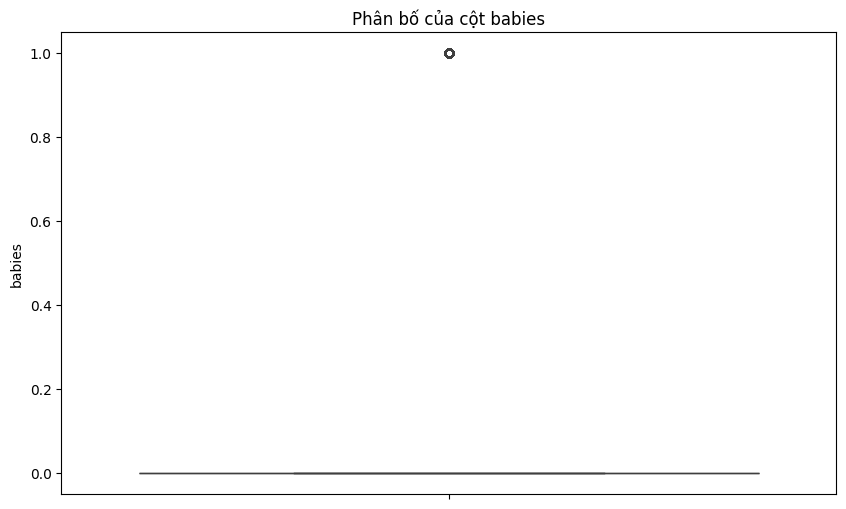

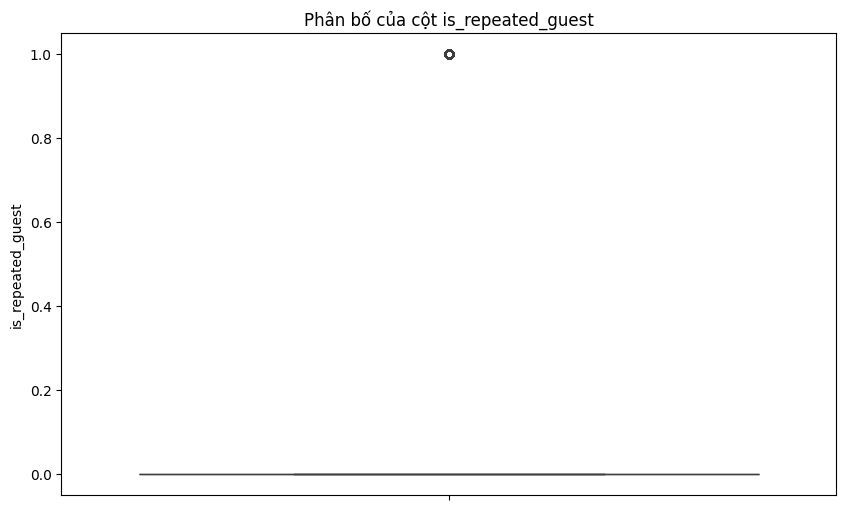

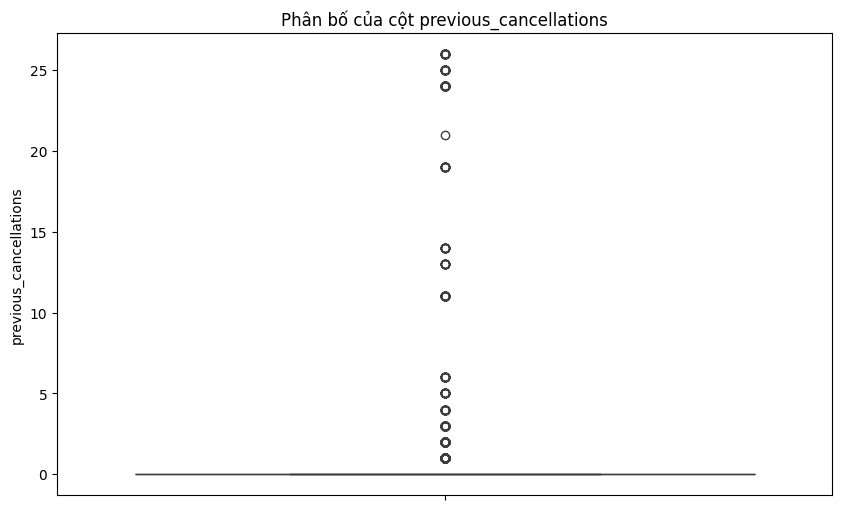

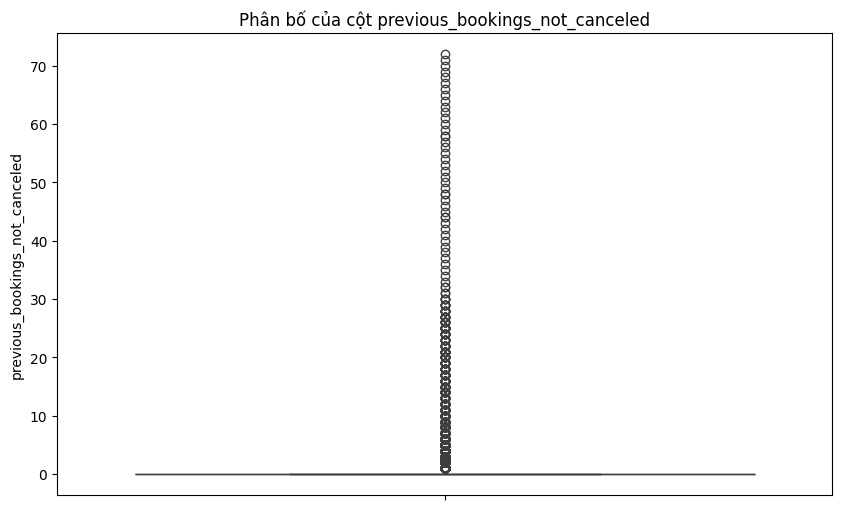

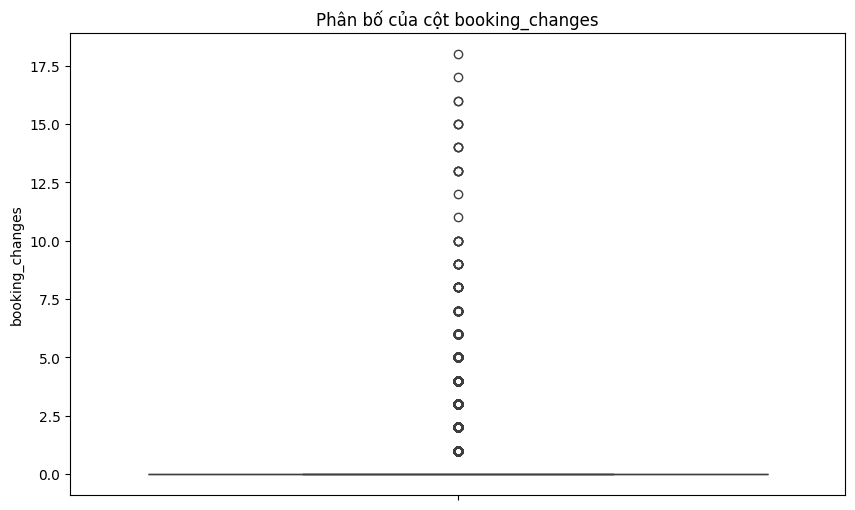

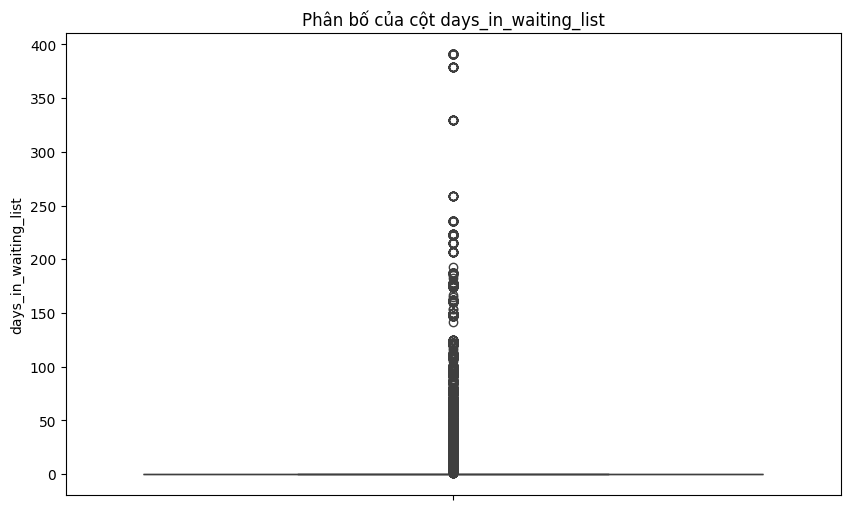

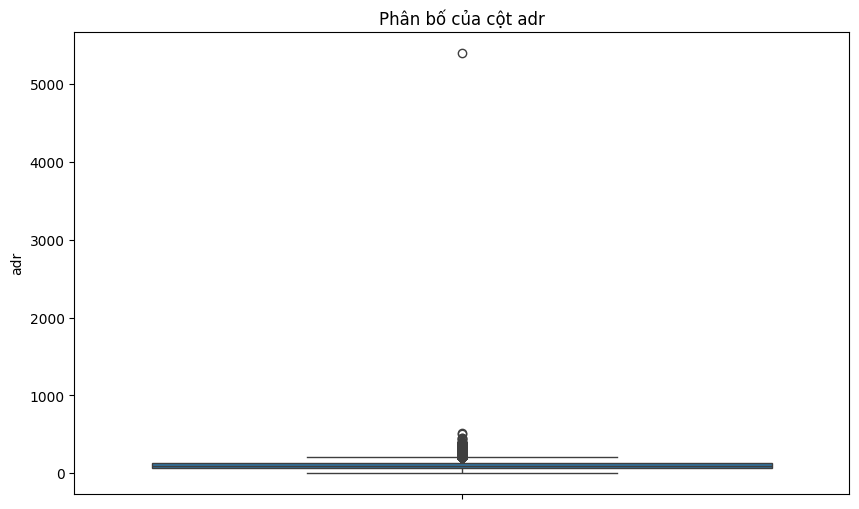

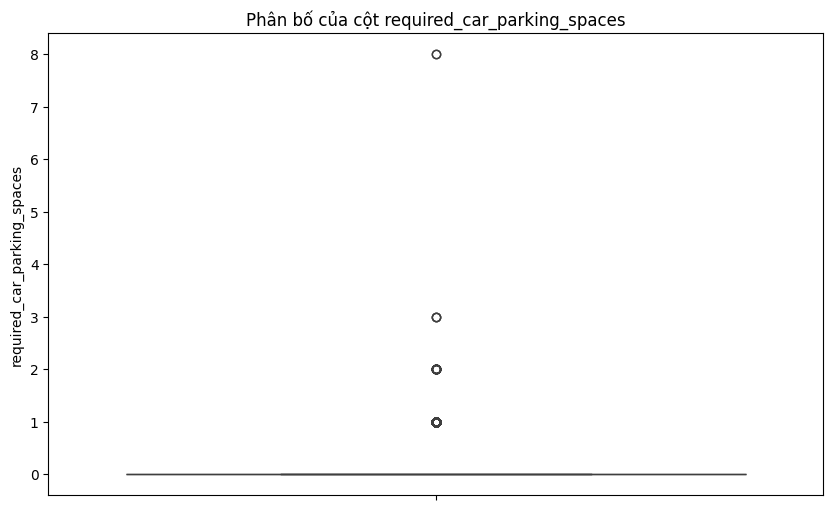

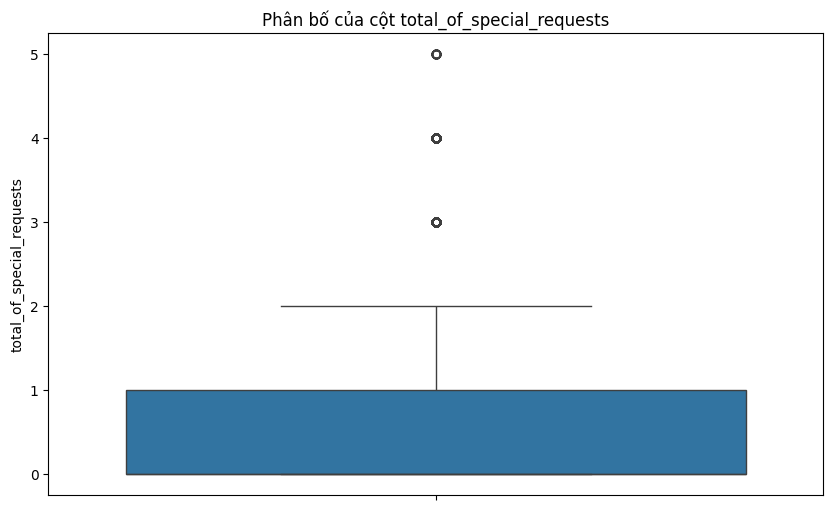

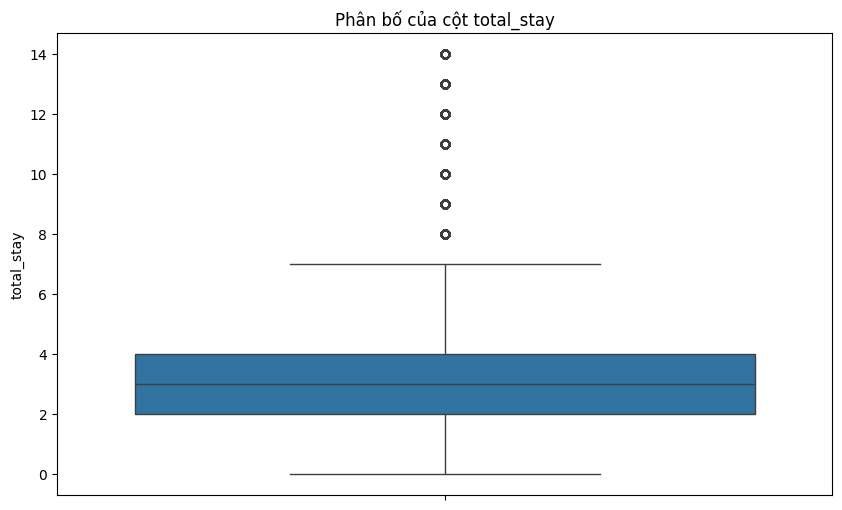

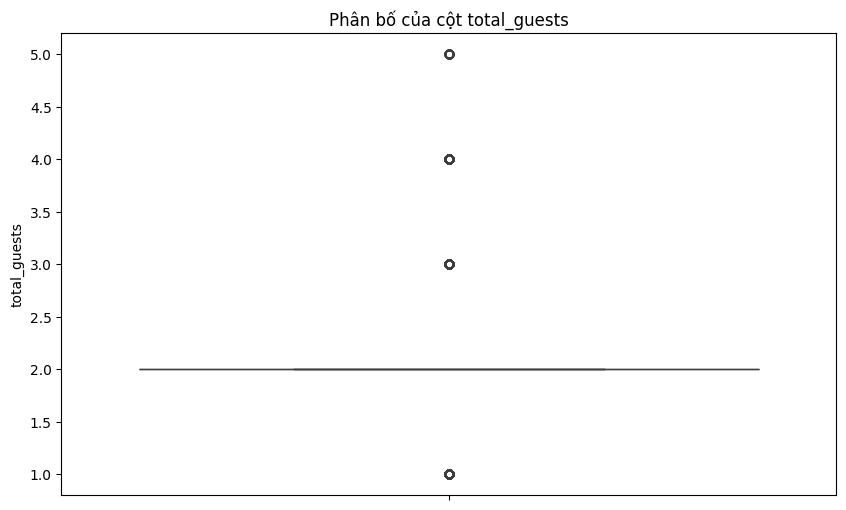

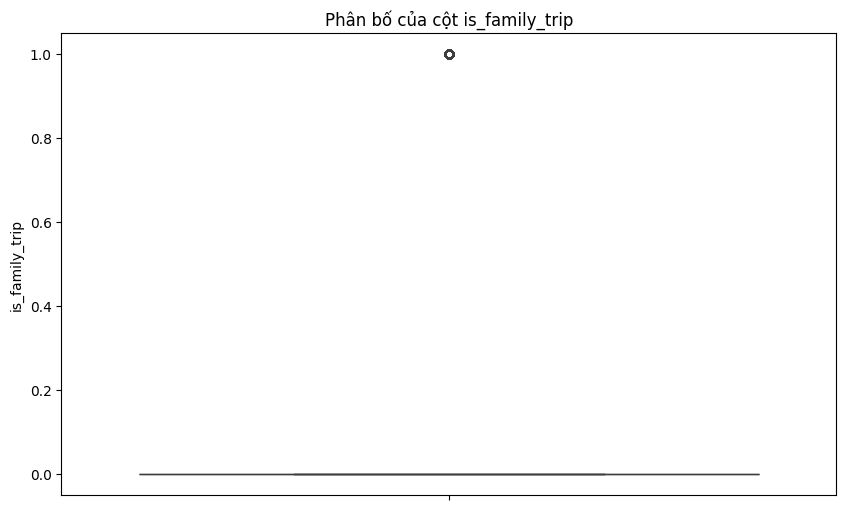

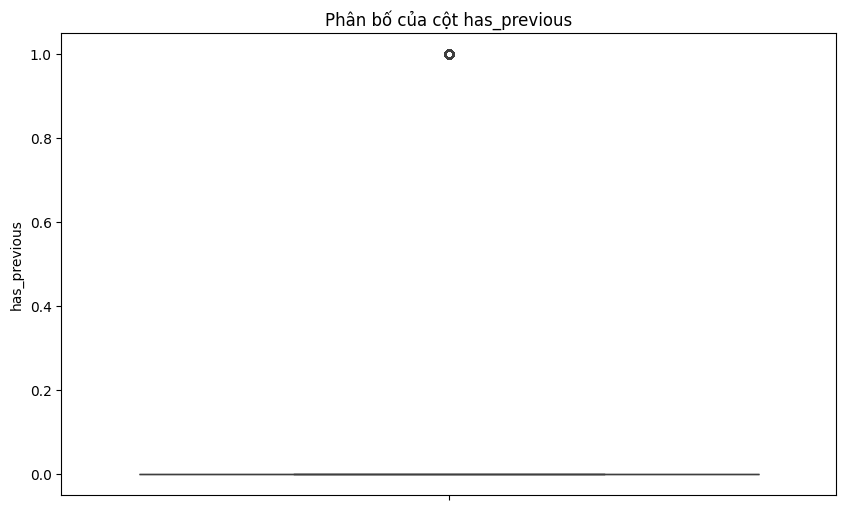

In [153]:
# Vẽ biểu đồ phân bố cho cột số
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'Phân bố của cột {col}')
    plt.show()


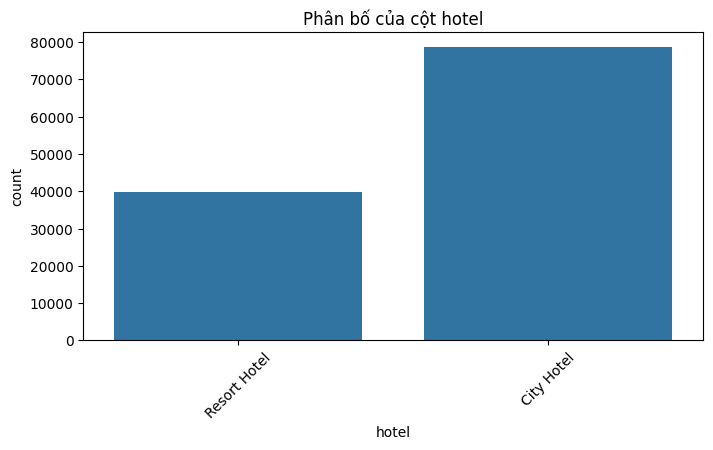

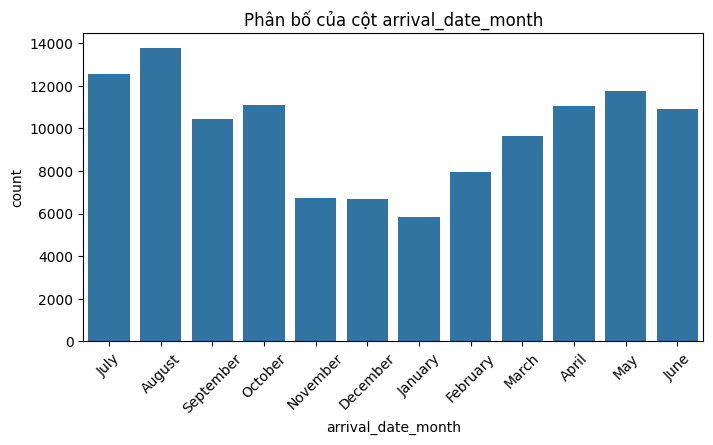

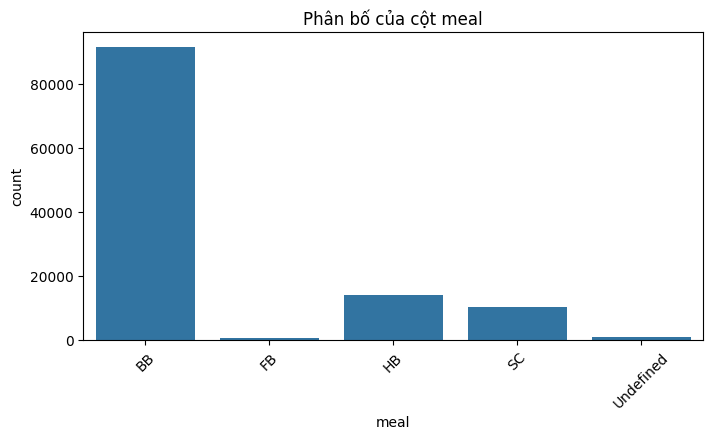

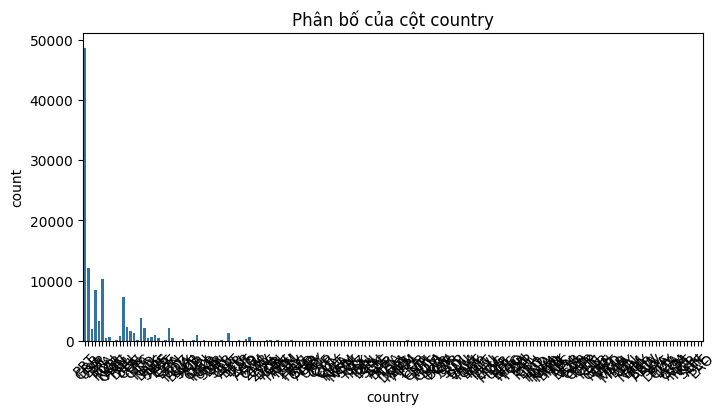

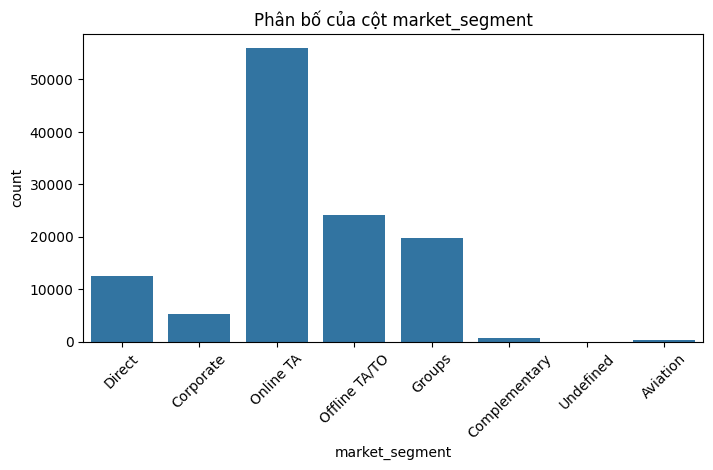

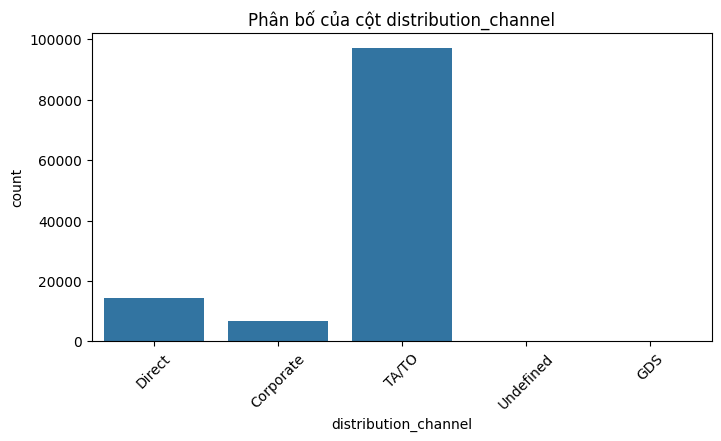

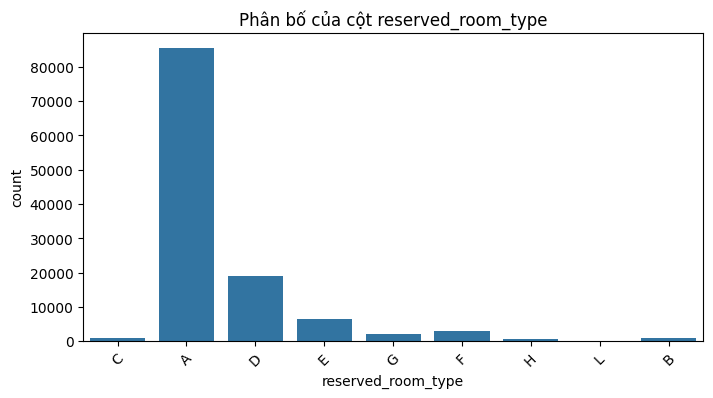

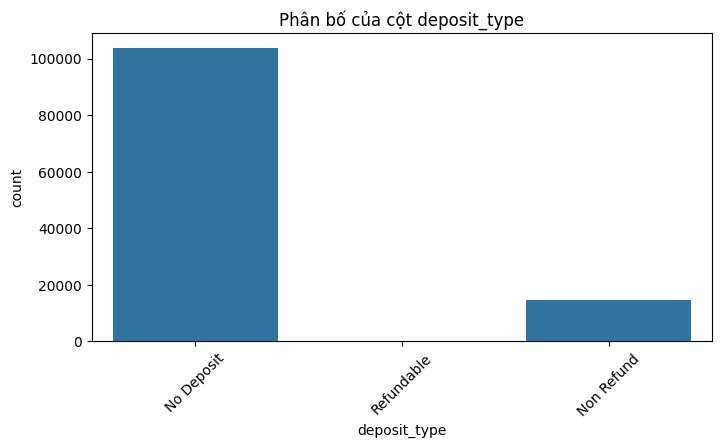

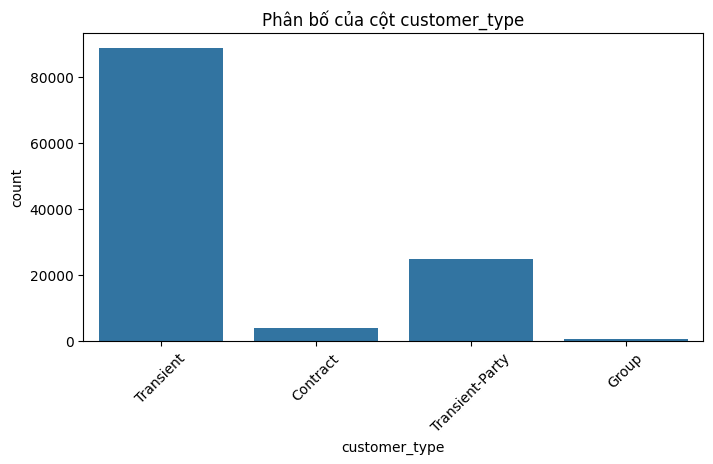

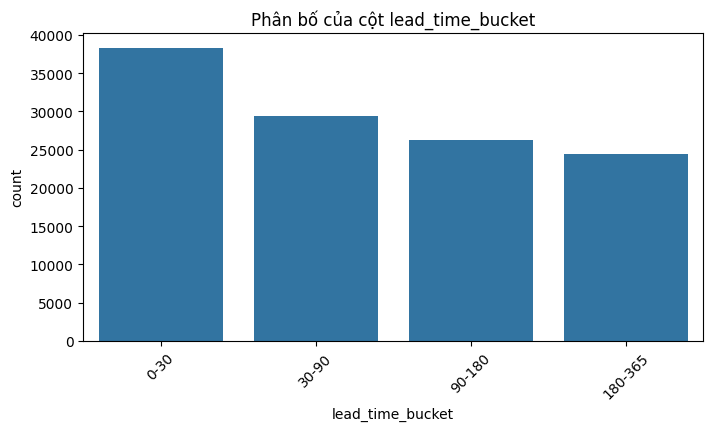

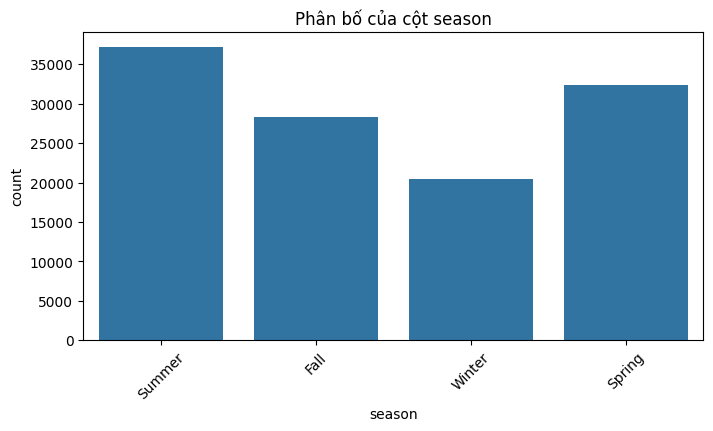

In [11]:
# Đánh giá phân bố của các dữ nhãn có trong biến phân loại

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=X)
    plt.title(f'Phân bố của cột {col}')
    plt.xticks(rotation=45)
    plt.show()


### **(1) Xu hướng đặt phòng thay đổi như thế nào theo thời gian và mùa vụ?**

Các đặc trưng gợi ý được sử dụng:
* `arrival_date` = `arrival_date_year` + `arrival_month_num` + `arrival_date_day_of_month`: Xác định xem tháng nào sẽ có số lượng booking nhiều đồng thới vẽ lineplot đánh giá xu hướng
* `arrival_month_num`: Xác định số lượng booking theo các tháng tháng
* `season`: Xác định số lượng booking theo mùa
* `adr`: Xác định giá trung bình của phòng biến động
* `is_cancelled`: Xác định tỷ lệ đặt hủy phòng

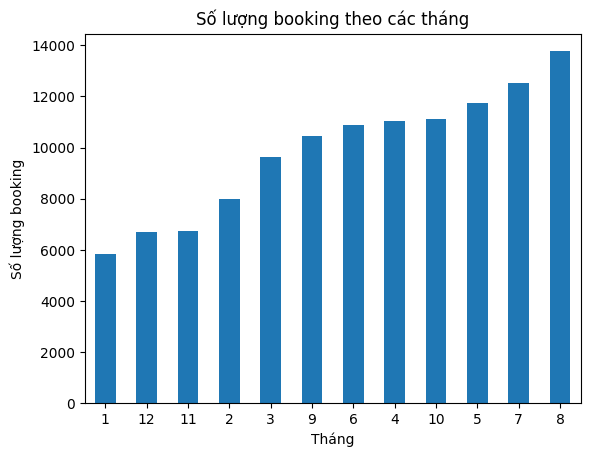

In [12]:
df.groupby('arrival_month_num').size().sort_values(ascending=True).plot(kind='bar')
plt.title('Số lượng booking theo các tháng')
plt.xlabel('Tháng')
plt.xticks(rotation=360)
plt.ylabel('Số lượng booking')
plt.show()

In [13]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)

monthly_bookings = (
    df.groupby(df['arrival_date'].dt.to_period('M'))
      .size()
      .reset_index(name='num_bookings')
)

monthly_bookings


,arrival_date,num_bookings
0,2015-07,2760
1,2015-08,3865
2,2015-09,5092
3,2015-10,4925
4,2015-11,2315
5,2015-12,2892
6,2016-01,2210
7,2016-02,3840
8,2016-03,4784
9,2016-04,5409


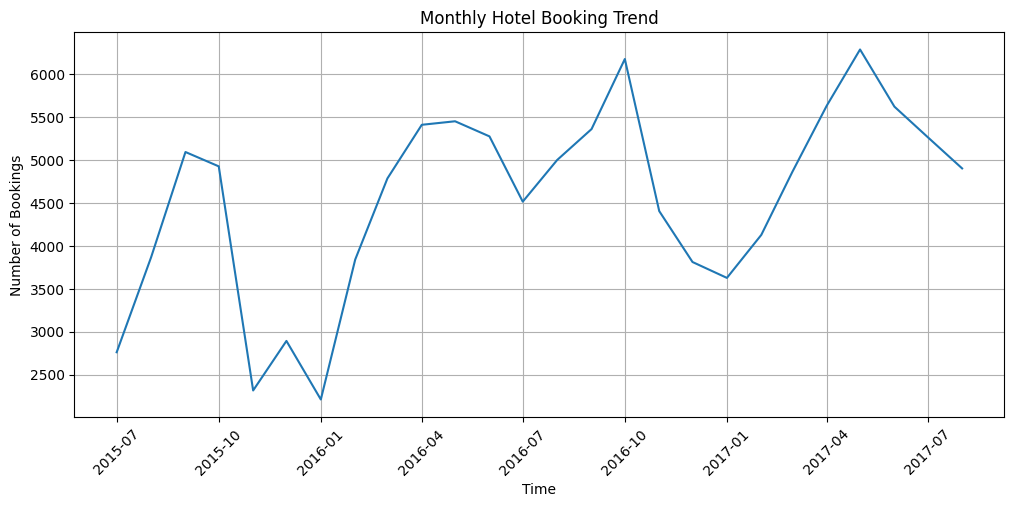

In [14]:
# Plot xu hướng để đánh giá số lượng đặt phòng theo thời gian
monthly_bookings['arrival_date'] = monthly_bookings['arrival_date'].dt.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(
    monthly_bookings['arrival_date'],
    monthly_bookings['num_bookings']
)

plt.title('Monthly Hotel Booking Trend')
plt.xlabel('Time')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
df.groupby('season').agg(
    bookings=('is_canceled','count'),
    cancel_rate=('is_canceled','mean'),
    avg_adr=('adr','mean')
).sort_values(by='cancel_rate', ascending=False)

,bookings,cancel_rate,avg_adr
season,,,
Summer,37198,0.387951,128.803268
Spring,32422,0.377306,97.648919
Fall,28270,0.368164,91.048511
Winter,20506,0.329269,75.221678


* Mùa hè đánh giá là mùa cao điểm nhất đánh giá rằng tỷ lệ hủy phòng cũng khác cao hơn những mùa còn lại và giá cũng tăng mạnh so với những mùa còn lại

In [16]:
df.groupby('arrival_weekday')['is_canceled'].mean().round(2)

,is_canceled
arrival_weekday,
0,0.34
1,0.33
2,0.36
3,0.41
4,0.41
5,0.39
6,0.32


Tỷ lệ hủy cao nhất rơi vào **Thứ Năm – Thứ Sáu**
* Đây thường là thời điểm:
  * Khách thay đổi kế hoạch sát ngày
  * Booking linh hoạt (OTA, business trip)
Chủ Nhật có tỷ lệ hủy thấp nhất
* Booking cuối tuần thường:
  * Đi nghỉ thật
  * Ít thay đổi, ít hủy

In [17]:
df.groupby('arrival_weekday')['adr'].mean()

,adr
arrival_weekday,
0,102.848207
1,100.843943
2,98.826342
3,98.818675
4,105.677219
5,102.257990
6,104.374794


* ADR thấp nhất vào giữa tuần (Tue–Thu)
  * Khách công tác
  * Giá cạnh tranh, volume cao
* ADR cao nhất vào Thứ Sáu – Cuối tuần
  * Khách nghỉ dưỡng
  * Sẵn sàng trả giá cao

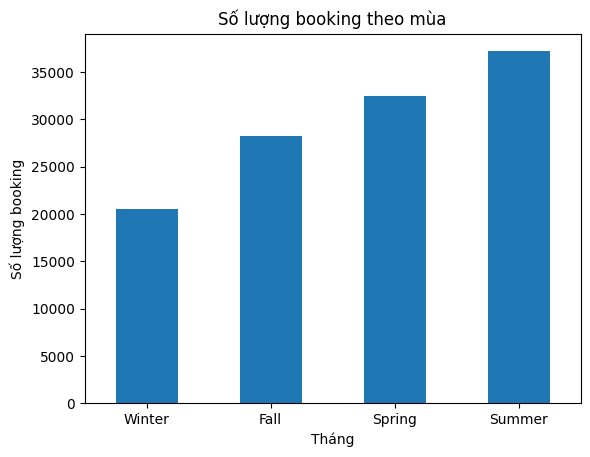

In [18]:
df.groupby('season').size().sort_values(ascending=True).plot(kind='bar')
plt.title('Số lượng booking theo mùa')
plt.xlabel('Tháng')
plt.xticks(rotation=360)
plt.ylabel('Số lượng booking')
plt.show()


Số lượng booking cao nhất là vào mùa hè và giảm dần về các mùa và thấp nhất chính là mùa đông

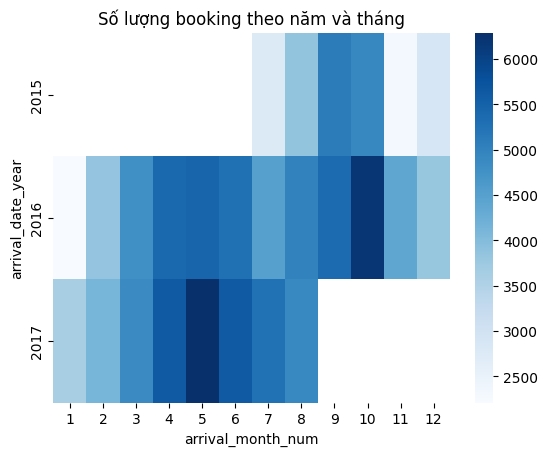

In [19]:
monthly_bookings['arrival_date_year'] = monthly_bookings['arrival_date'].dt.year
monthly_bookings['arrival_month_num'] = monthly_bookings['arrival_date'].dt.month

pivot = monthly_bookings.pivot(
    index='arrival_date_year',
    columns='arrival_month_num',
    values='num_bookings'
)

sns.heatmap(pivot, cmap='Blues')
plt.title('Số lượng booking theo năm và tháng')
plt.show()

Xu hướng đặt phòng thể hiện theo hướng tăng dần qua các năm đồng thời cũng thể hiện rõ tính mùa vụ

1. Theo thời gian
    * Tổng số booking có xu hướng tăng dần qua các năm
    * Phản ánh sự phát triển của ngành du lịch và kênh đặt phòng trực tuyến
2. Theo mùa vụ
    * Mùa hè (tháng 6–8) là cao điểm đặt phòng
    * Mùa đông là thấp điểm, lượng booking giảm đáng kể
    * Mô hình mùa vụ lặp lại ổn định giữa các năm
3. Theo các ngày trong tuần
  * Trong các ngày giữa tuần thường có xu hướng hủy phòng cao hơn do giá thành thấp
  * Các ngày cuối thường thường ít có xu hướng hủy phòng hơn đồng thời giá thành lại tăng cao
3. Hàm ý kinh doanh
    * Cần điều chỉnh giá và chính sách hủy theo mùa
    * Tăng nhân sự, phòng trống vào mùa cao điểm
    * Kích cầu (promotion) vào mùa thấp điểm
    * Điều chỉnh thêm các chính sách đẩy mạnh doanh thu vào cuối tuần

### **(2) Những phân khúc khách hàng nào có tỷ lệ hủy phòng cao hoặc hành vi đặt phòng đặc thù?**


Các đặc trưng gợi ý được sử dụng:
* `market_segment`: Xác định xem nền tảng nào sẽ có số lượng hủy phòng nhiều nhất
* `customer_type`: Xác định loại khách hàng nào có xu hướng hủy phòng
* `deposit_type`: Xác định chính sách hủy phòng như thế nào
* `lead_time_bucket`: Xác định thời gian đặt phòng trước có ảnh hưởng đến khả năng hủy hay không
* `has_previous`: Xác định tỷ lệ đặt hủy phòng theo hành vi đặt phòng trước hay không
* `is_family_trip`: Xác định các chuyến đi gia đình có khả năng hủy phòng hay không

In [20]:
df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False) # Lựa chọn phân khúc đặt hàng theo hành vi đặt phòng

,is_canceled
market_segment,
Undefined,1.000000
Groups,0.610624
Online TA,0.366333
Offline TA/TO,0.343781
Aviation,0.224215
Corporate,0.186573
Direct,0.151693
Complementary,0.122053


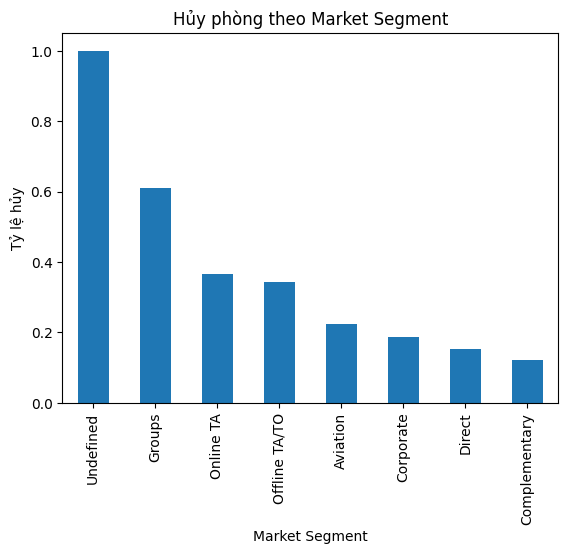

In [21]:
# Phân tích hủy phòng theo Market Segment
df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False).plot(kind ='bar')
plt.title('Hủy phòng theo Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Tỷ lệ hủy')
plt.show()


* Online TA và Offline TA/TO có tỷ lệ hủy cao nhất
* Direct và Corporate có tỷ lệ hủy thấp hơn đáng kể

In [22]:
# Theo customer_type
df.groupby('customer_type')['is_canceled'].mean()


,is_canceled
customer_type,
Contract,0.309518
Group,0.075540
Transient,0.407498
Transient-Party,0.253361


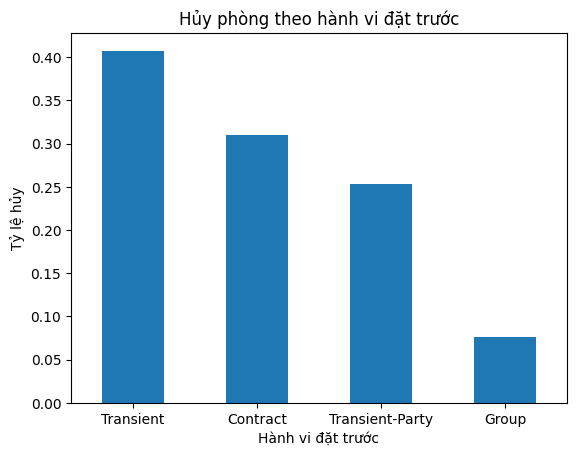

In [23]:
df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Hủy phòng theo hành vi đặt trước')
plt.xlabel('Hành vi đặt trước')
plt.xticks(rotation=360)
plt.ylabel('Tỷ lệ hủy')
plt.show()

* Transient (Khách lẻ ngắn hạn) customers là nhóm rủi ro cao nhất.
  * Thường đi kèm:
    * No Deposit
    * OTA
* Contract: Tỷ lệ hủy trung bình
  * Có hợp đồng
  * Có ràng buộc nhất định
  * Hủy ít hơn Transient nhưng vẫn đáng kể
* Transient-Party: Tỷ lệ hủy thấp hơn
  * Nhóm nhỏ có phối hợp
  * Cam kết cao hơn khách lẻ
* Group: Tỷ lệ hủy thấp nhât
  * Lên kế hoạch sớm
  * Có hợp đồng/đăt cọc
  * Đặt theo đoàn

In [24]:
# Thep deposit type
df.groupby('deposit_type')['is_canceled'].mean()


,is_canceled
deposit_type,
No Deposit,0.282778
Non Refund,0.993616
Refundable,0.217391


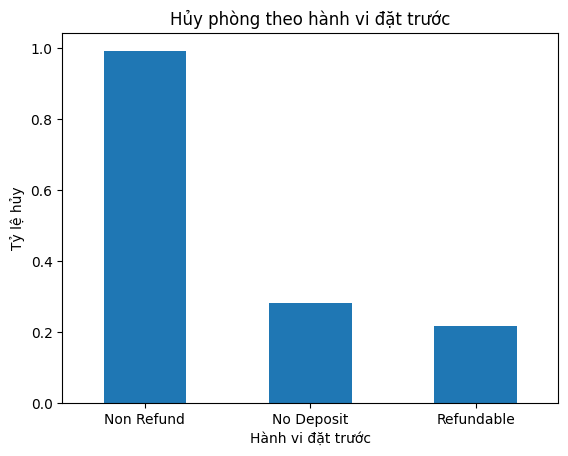

In [25]:
df.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Hủy phòng theo hành vi đặt trước')
plt.xlabel('Hành vi đặt trước')
plt.xticks(rotation=360)
plt.ylabel('Tỷ lệ hủy')
plt.show()


* No Deposit → tỷ lệ hủy cao nhất
  * Khách không mất gì khi hủy
  * Khách dễ:
    * Đặt nhiều nơi
    * Đổi kế hoạch
    * Hủy sát ngày
  * → Rủi ro cao
* Non Refund → gần như không hủy
  * Khách đã mất tiền nếu hủy
  * Hành vi cam kết
  * Rủi ro gần như không đáng kể
  * → Nhóm có chất lượng cao
* Refundable → trung gian
  * Có ràng buộc nhẹ
  * Khách vẫn linh họa nhưng có trách nhiệm hơn
Đây là yếu tố phân biệt mạnh nhất trong hành vi hủy phòng.

In [26]:
df.groupby('lead_time_bucket')['is_canceled'].mean()


,is_canceled
lead_time_bucket,
0-30,0.184465
30-90,0.376917
90-180,0.447327
180-365,0.570436


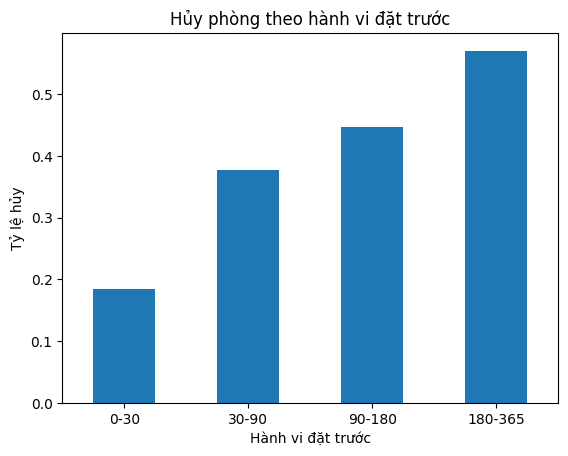

In [27]:
df.groupby('lead_time_bucket')['is_canceled'].mean().plot(kind='bar')
plt.title('Hủy phòng theo hành vi đặt trước')
plt.xlabel('Hành vi đặt trước')
plt.xticks(rotation=360)
plt.ylabel('Tỷ lệ hủy')
plt.show()

* Lead time càng dài → tỷ lệ hủy càng cao
* Nhóm 180–365 ngày có rủi ro hủy cao nhất


In [28]:
df.groupby('has_previous')['is_canceled'].mean()

,is_canceled
has_previous,
0,0.338572
1,0.916654


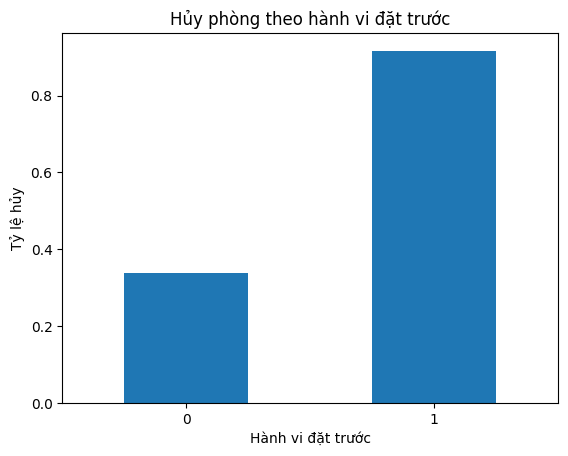

In [29]:
df.groupby('has_previous')['is_canceled'].mean().plot(kind='bar')
plt.title('Hủy phòng theo hành vi đặt trước')
plt.xlabel('Hành vi đặt trước')
plt.xticks(rotation=360)
plt.ylabel('Tỷ lệ hủy')
plt.show()

* Khách từng hủy trước đó → xác suất hủy cao hơn rõ rệt
* Hành vi mang tính lặp lại


In [30]:
df.groupby('is_family_trip')['is_canceled'].mean()

,is_canceled
is_family_trip,
0,0.371909
1,0.348739


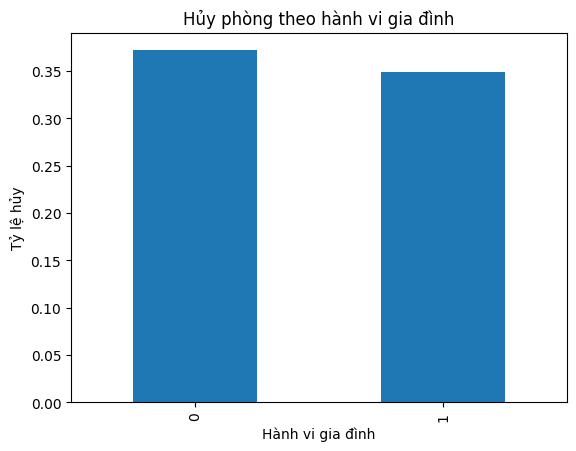

In [31]:
df.groupby('is_family_trip')['is_canceled'].mean().plot(kind='bar')
plt.title('Hủy phòng theo hành vi gia đình')
plt.xlabel('Hành vi gia đình')
plt.ylabel('Tỷ lệ hủy')
plt.show()

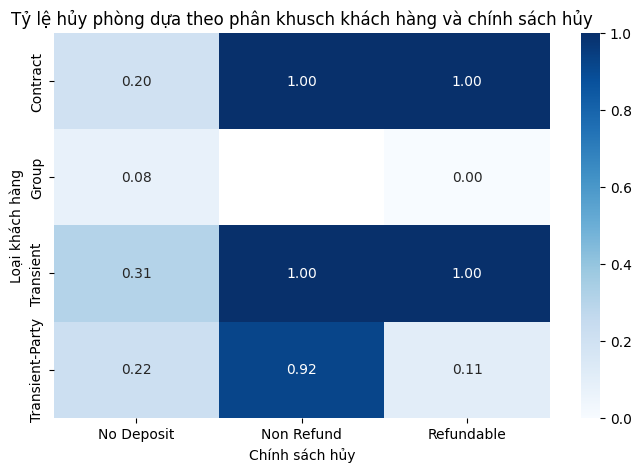

In [32]:
# Tạo bảng pivot: tỷ lệ hủy
heatmap_data = (
    df.groupby(['customer_type', 'deposit_type'])['is_canceled']
      .mean()
      .unstack()
)

plt.figure(figsize=(8,5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title('Tỷ lệ hủy phòng dựa theo phân khusch khách hàng và chính sách hủy')
plt.xlabel('Chính sách hủy')
plt.ylabel('Loại khách hàng')
plt.show()

* Family trip → hủy thấp hơn
* Khách cá nhân → linh hoạt, dễ hủy

* Những phân khúc có tỷ lệ hủy cao
  * Online Travel Agents (OTA) Đặt
  * Transient customers
  * Không đặt cọc (No Deposit)
  * Lead time dài
  * Khách có tiền sử hủy phòng

* Những phân khúc có hành vi ổn định

  * Khách Corporate / Contract
  * Khách đặt trực tiếp
  * Khách đặt cọc không hoàn tiền
  * Chuyến đi gia đình

### **(3) Loại phòng hoặc dịch vụ nào được đặt phổ biến nhất trong từng giai đoạn?**

Các đặc trưng gợi ý được sử dụng:
* `reserved_room_type`: Xác định xem có bao nhiều kiểu phòng được phục vụ
* `season`: Xác định xem đối với mùa nào bữa ăn nào, kiểu phòng được phục vụ nhữ thế nào
* `arrival_month_num`: Xác định theo từng thang xu hướng phòng được đặt như thế nào
* `meal`: Xác định trong thời gian nào dịch vụ ăn nào được sử dụng nhiều nhất
* `total_of_special_requests`: Xác định các nhu cầu đặt phòng đặc biệt khác có được phổ biến hay ảnh hưởng đến trải nghiệm hay không
* `required_car_parking_spaces`: Xác định yêu cầu có bãi gửi xe có phải là yếu tố mạnh  để ảnh hưởng đến hành vi khách hàng hay không

In [33]:
df['reserved_room_type'].value_counts()


,count
reserved_room_type,
A,85591
D,19081
E,6443
F,2870
G,2011
C,917
B,906
H,572
L,5


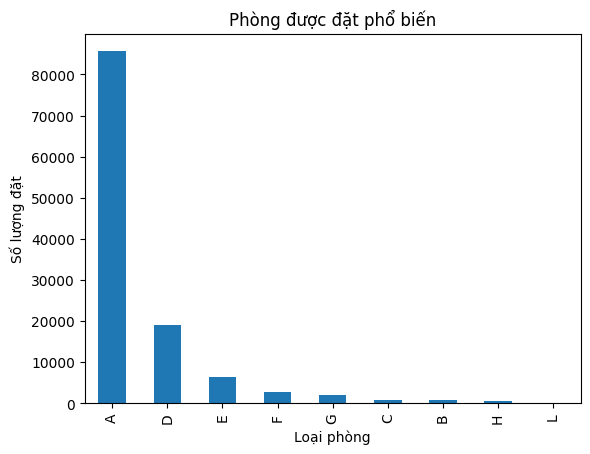

In [34]:
df['reserved_room_type'].value_counts().plot(kind='bar') # Thống kê số lượng của loại phòng
plt.title('Phòng được đặt phổ biến')
plt.xlabel('Loại phòng')
plt.ylabel('Số lượng đặt')
plt.show()


* Một số loại phòng tiêu chuẩn (ví dụ: A, D) chiếm phần lớn booking
* Các loại phòng cao cấp chiếm tỷ lệ nhỏ nhưng có xu hướng tăng vào mùa cao điểm
→ Nhu cầu tập trung vào phòng tiêu chuẩn

In [35]:
room_season = (
    df.groupby(['season', 'reserved_room_type'])
      .size()
      .reset_index(name='num_bookings')
)

room_season

,season,reserved_room_type,num_bookings
0,Fall,A,22083
1,Fall,B,166
2,Fall,C,85
3,Fall,D,3745
4,Fall,E,1195
5,Fall,F,551
6,Fall,G,353
7,Fall,H,92
8,Spring,A,23031
9,Spring,B,185


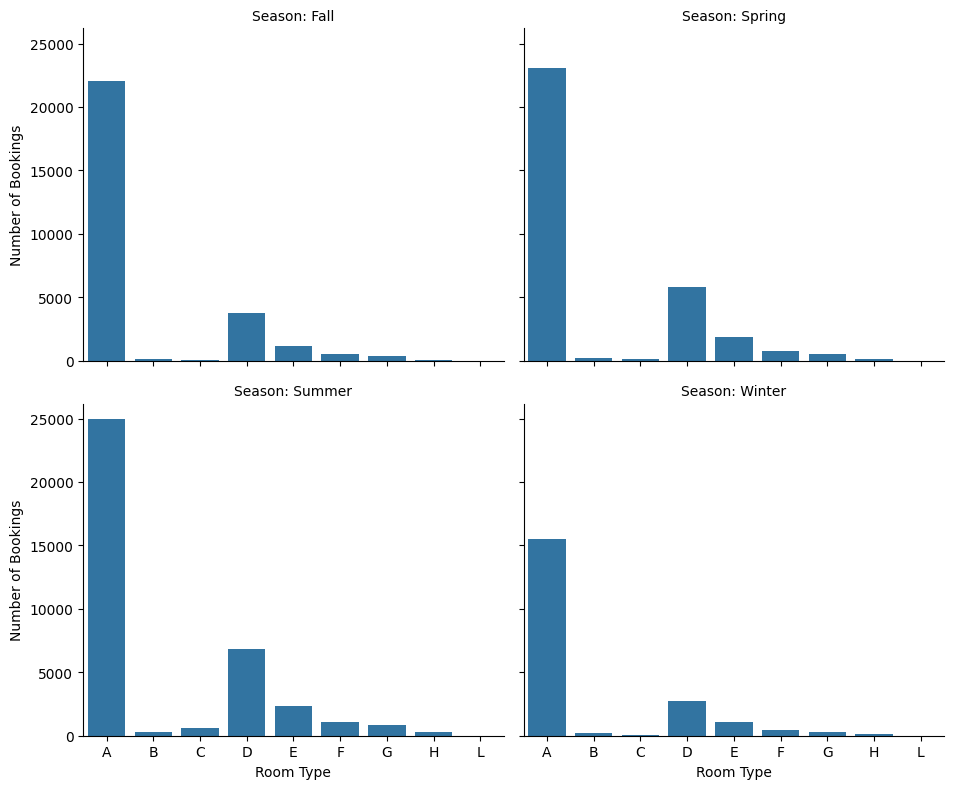

In [36]:
g = sns.catplot(
    data=room_season,
    x='reserved_room_type',
    y='num_bookings',
    col='season',
    kind='bar',
    col_wrap=2,
    height=4,
    aspect=1.2
)
g.set_axis_labels("Room Type", "Number of Bookings")
g.set_titles("Season: {col_name}")
plt.show()


In [37]:
df.groupby('season')['reserved_room_type'].value_counts(normalize=True) # Sự phổ biến chính là do tổng sở thích thực sự

season  reserved_room_type
Fall    A                     0.781146
        D                     0.132473
        E                     0.042271
        F                     0.019491
        G                     0.012487
        B                     0.005872
        H                     0.003254
        C                     0.003007
Spring  A                     0.710351
        D                     0.178922
        E                     0.058386
        F                     0.022886
        G                     0.015792
        B                     0.005706
        C                     0.004812
        H                     0.003146
Summer  A                     0.670412
        D                     0.183800
        E                     0.061939
        F                     0.029679
        G                     0.022689
        C                     0.015646
        B                     0.008334
        H                     0.007366
        L                     0.000134
Winter  A                     0.757778
        D                     0.131571
        E                     0.051253
        F                     0.023066
        G                     0.014727
        B                     0.011948
        H                     0.005072
        C                     0.004584
Name: proportion, dtype: float64

  * Summer: tăng rõ rệt nhu cầu phòng lớn / cao cấp
  * Winter: tập trung phòng tiêu chuẩn, chi phí thấp
* Phản ánh hành vi:
  * Mùa cao điểm → khách sẵn sàng chi trả cao hơn
  * Mùa thấp điểm → ưu tiên tiết kiệm

In [38]:
room_month = (
    df.groupby(['arrival_month_num', 'reserved_room_type'])
      .size()
      .reset_index(name='num_bookings')
)

room_month

,arrival_month_num,reserved_room_type,num_bookings
0,1,A,4597
1,1,B,63
2,1,C,16
3,1,D,642
4,1,E,285
...,...,...,...
93,12,D,980
94,12,E,374
95,12,F,178
96,12,G,98


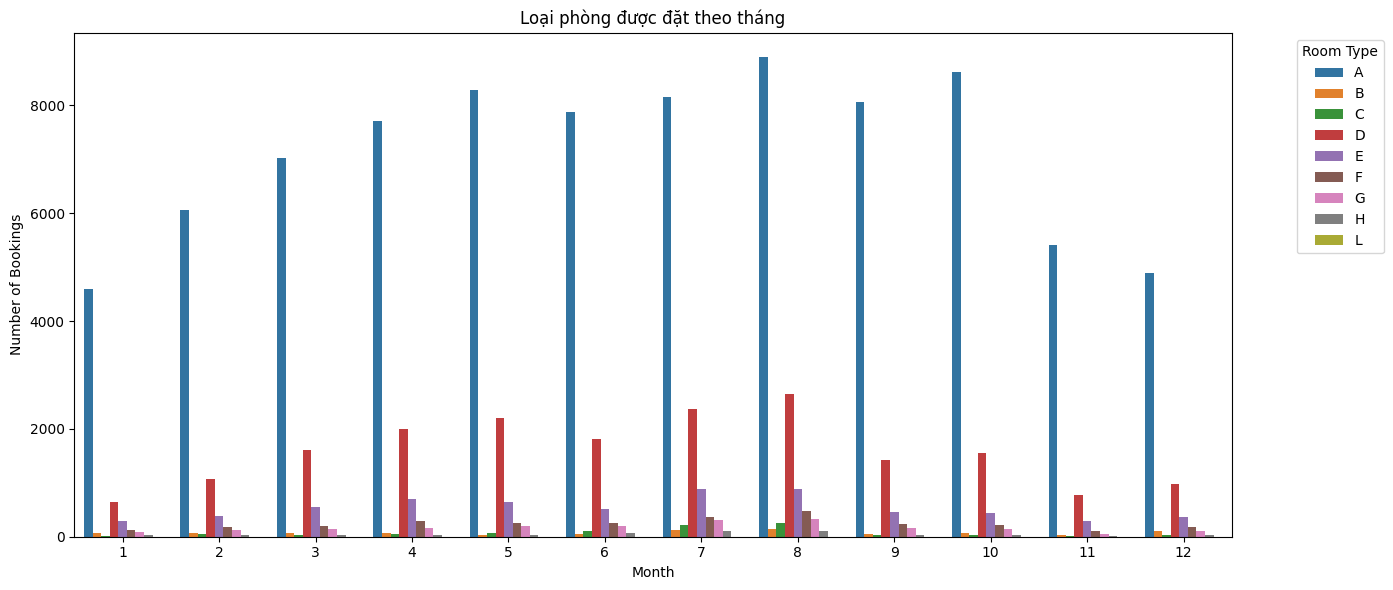

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=room_month,
    x='arrival_month_num',
    y='num_bookings',
    hue='reserved_room_type'
)

plt.title('Loại phòng được đặt theo tháng')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

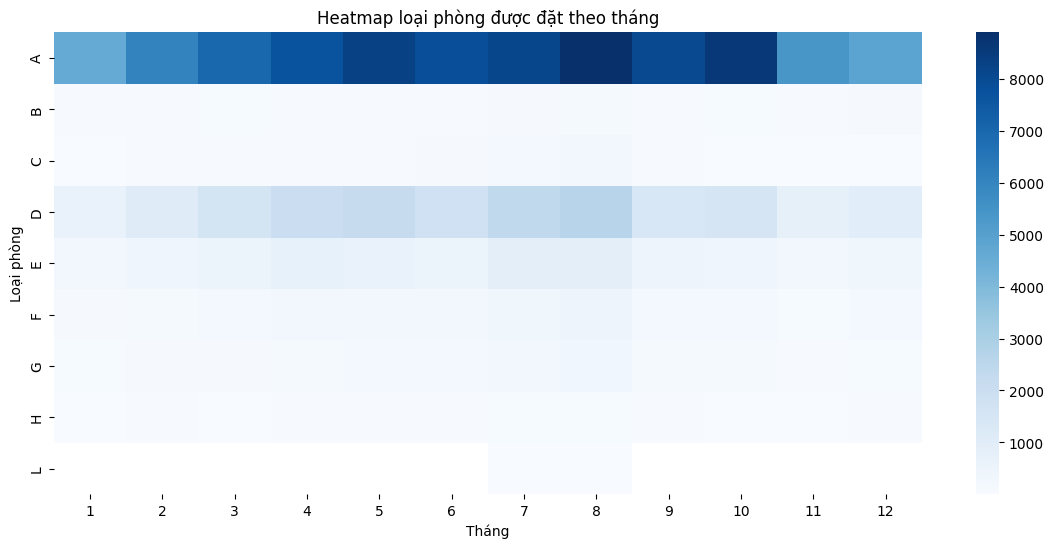

In [40]:
pivot = room_month.pivot(
    index='reserved_room_type',
    columns='arrival_month_num',
    values='num_bookings'
)

plt.figure(figsize=(14,6))
sns.heatmap(
    pivot,
    cmap='Blues',
    annot=False
)

plt.title('Heatmap loại phòng được đặt theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Loại phòng')
plt.show()


In [41]:
df.groupby('meal').size()

,0
meal,
BB,91631
FB,797
HB,14302
SC,10503
Undefined,1163


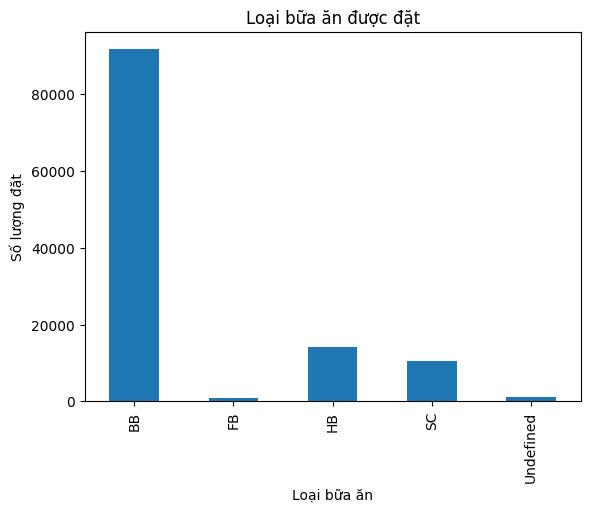

In [42]:
df.groupby('meal').size().plot(kind='bar')
plt.title('Loại bữa ăn được đặt')
plt.xlabel('Loại bữa ăn')
plt.ylabel('Số lượng đặt')
plt.show()

In [43]:
df.groupby(['season','meal']).size() # Phân tích xem bữa ăn nào được chọn theo mùa

season  meal     
Fall    BB           22774
        FB             195
        HB            3494
        SC            1748
        Undefined       59
Spring  BB           25274
        FB             128
        HB            3388
        SC            3287
        Undefined      345
Summer  BB           27532
        FB             238
        HB            5736
        SC            3556
        Undefined      136
Winter  BB           16051
        FB             236
        HB            1684
        SC            1912
        Undefined      623
dtype: int64

In [44]:
df.groupby('season')['total_of_special_requests'].mean()


,total_of_special_requests
season,
Fall,0.516625
Spring,0.517982
Summer,0.663100
Winter,0.559592


In [45]:
df.groupby('season')['required_car_parking_spaces'].mean()


,required_car_parking_spaces
season,
Fall,0.057446
Spring,0.056752
Summer,0.065998
Winter,0.072954


Các biến thêm yếu cầu đặc biệt không có ảnh hưởng gì lớn đến với xu hướng và hành vi đặt phòng của khách
Tuy nhiên
* Vào nàu đồng đáng thấy là khách có yêu cầu rằng phải có phải đỗ xe lại cao hơn những mùa khác

### **(4) Những yếu tố nào ảnh hưởng đến biến động giá phòng và tỷ lệ hủy phòng?**

Các đặc trưng gợi ý được sử dụng:
* Ta chia thành 4 yếu tố chính:
  * Yếu tố thời gian
    * `season`: Xác định xem đối với mùa giá trung bình khách sạn thay đổi như thế nào, tỷ lệ hủy phòng ra sao
    * `arrival_month_num`: Xác định theo từng thang xu hướng phòng được đặt như thé nào
    * `arrival_weekday`: Xác định giá trung bình cũng như mức độ hủy phòng qua từng ngày trong tuần
  * Yếu tố hành vi khách hàng
    * `lead_time_bucket`: Thời gian chờ có ảnh hưởng đến tỷ lệ hủy phòng hay không
    * `market_segment`: Đối với thị trường nào thì có thể tý lệ cũng như giá phòng trung bình cao nhát
    * `has_previous`: Các khách đã hủy từ trước có quyết định đến giá phòng cũng như sinh tỷ lệ hủy phòng hay không
    * `deposit_type`: Trong số những khách họ hủy thì có bao nhiêu người có giá phòng trung bình như thế nào chính sách hủy phòng ra sao để họ hủy phòng
  * Yếu tố phòng và dịch vụ
    * `reserved_room_type`: Xác định xem đối với loại phòng nào giá phòng thay đổi ra sao
    * `meal`: Xác định trong thời gian nào dịch vụ an giá phòng đạt như thế nào
  * Yếu tố quy mô phòng
    * `total_guest`: Gía phòng và tỷ lệ hủy phòng có ảnh hưởng đến số lượng người hay không
    * `total_stay`: Gía phòng thay đổi như thế nào đối với chiều dài ở lại qua đêm


#### **1. Yếu tố thời gian**

In [97]:
df.groupby('season')[['adr', 'is_canceled']].mean() # Gía phòng trung bình theo từng mùa

,adr,is_canceled
season,,
Fall,91.048511,0.368164
Spring,97.648919,0.377306
Summer,128.803268,0.387951
Winter,75.221678,0.329269


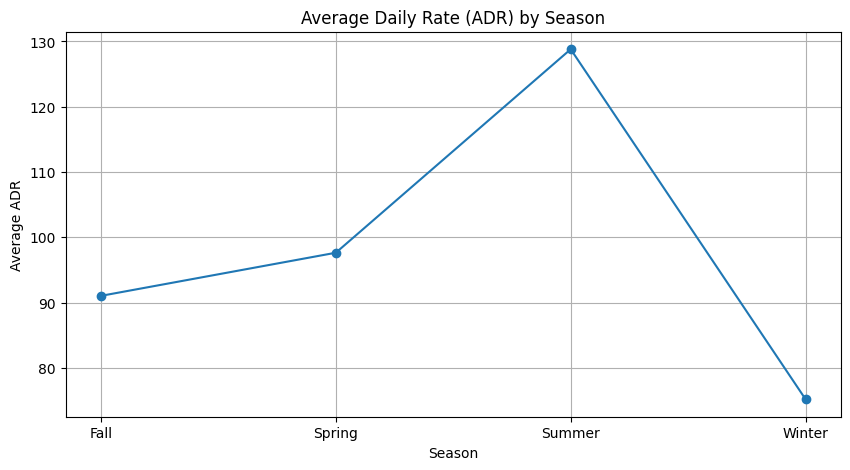

In [151]:
season_adr = (
    df.groupby('season')['adr']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(
    season_adr['season'],
    season_adr['adr'],
    marker='o'
)

plt.title('Average Daily Rate (ADR) by Season')
plt.xlabel('Season')
plt.ylabel('Average ADR')
plt.grid(True)
plt.show()

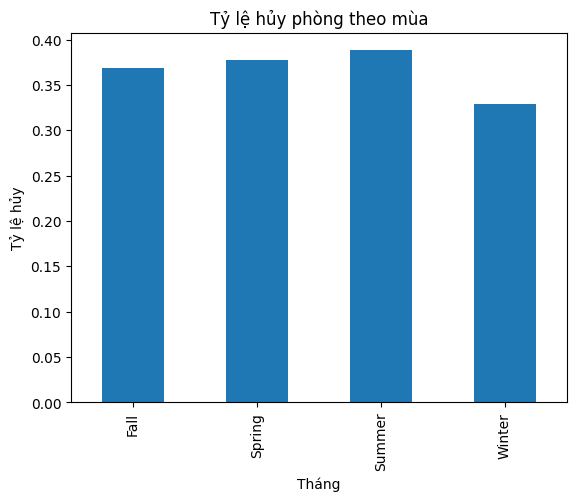

In [91]:
df.groupby('season')['is_canceled'].mean().plot(kind='bar')
plt.title('Tỷ lệ hủy phòng theo mùa')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ hủy')
plt.show()

* Mùa hè có giá biến động cao nhất cho thấy khách sạn có thay đổi giá vào các mùa cao điểm và mùa hè mùa xuấn chính là những mùa cao điểm

In [94]:
df.groupby('arrival_month_num')[['is_canceled', 'adr']].mean() # Tỷ lệ hủy phòng và giá trung bình qua các tháng

,is_canceled,adr
arrival_month_num,,
1,0.300720,70.416011
2,0.333375,73.576555
3,0.318196,80.989591
4,0.408115,100.436296
5,0.396898,108.717750
6,0.415091,116.715816
7,0.375070,126.870802
8,0.378206,140.129959
9,0.391541,105.143244


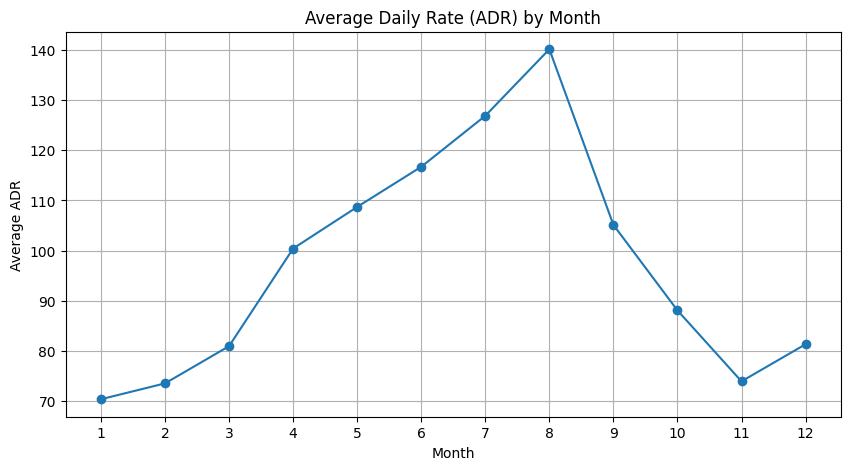

In [83]:
monthly_adr = (
    df.groupby('arrival_month_num')['adr']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(
    monthly_adr['arrival_month_num'],
    monthly_adr['adr'],
    marker='o'
)

plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

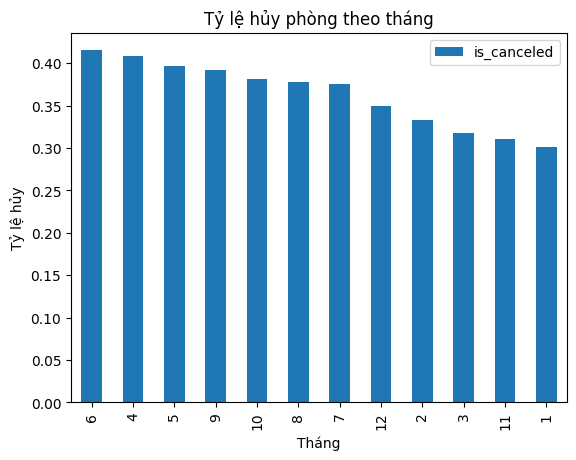

In [105]:
df.groupby('arrival_month_num')[['is_canceled']].mean().sort_values(ascending=False, by = 'is_canceled').plot(kind='bar')
plt.title('Tỷ lệ hủy phòng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ hủy')
plt.show()

In [109]:
df.groupby('arrival_weekday')[['adr', 'is_canceled']].mean()

,adr,is_canceled
arrival_weekday,,
0,102.848207,0.339976
1,100.843943,0.327337
2,98.826342,0.360673
3,98.818675,0.412838
4,105.677219,0.405903
5,102.257990,0.394934
6,104.374794,0.322374


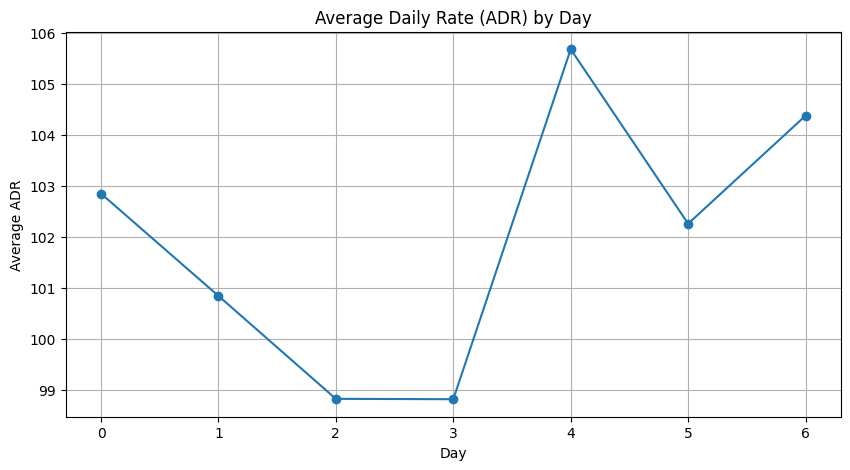

In [112]:
monthly_adr = (
    df.groupby('arrival_weekday')['adr']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(
    monthly_adr['arrival_weekday'],
    monthly_adr['adr'],
    marker='o'
)

plt.title('Average Daily Rate (ADR) by Day')
plt.xlabel('Day')
plt.ylabel('Average ADR')
plt.grid(True)
plt.show()

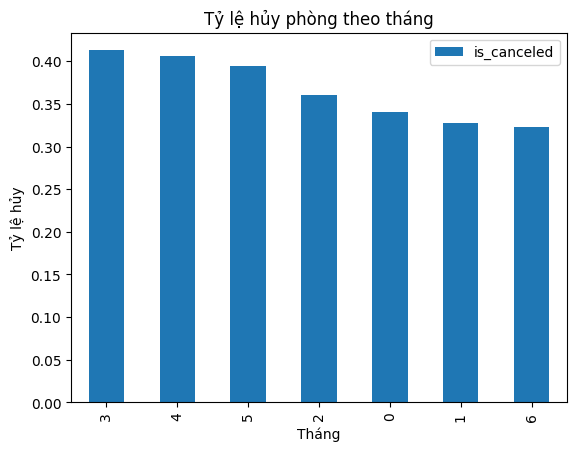

In [108]:
df.groupby('arrival_weekday')[['is_canceled']].mean().sort_values(ascending=False, by = 'is_canceled').plot(kind='bar')
plt.title('Tỷ lệ hủy phòng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ hủy')
plt.show()

#### **2. Yếu tố hành vi khách hàng**

In [113]:
df.groupby('lead_time_bucket')[['adr', 'is_canceled']].mean()


,adr,is_canceled
lead_time_bucket,,
0-30,99.110373,0.184465
30-90,106.646616,0.376917
90-180,109.231303,0.447327
180-365,93.102227,0.570436


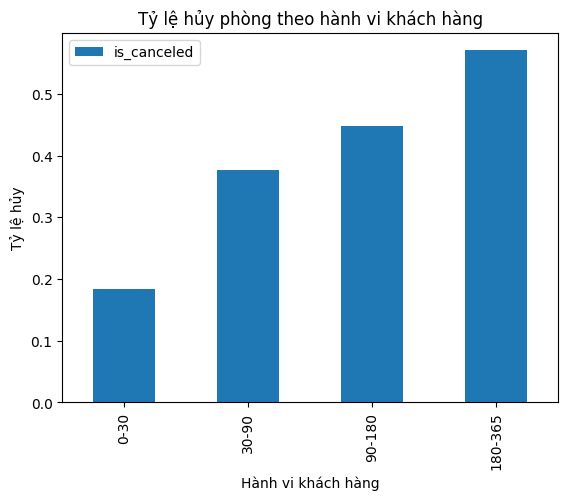

In [121]:
df.groupby('lead_time_bucket')[['is_canceled']].mean().plot(kind = 'bar')
plt.title('Tỷ lệ hủy phòng theo hành vi khách hàng')
plt.xlabel('Hành vi khách hàng')
plt.ylabel('Tỷ lệ hủy')
plt.show()

Thời gian chờ càng dài thì tỷ lệ hủy phòng càng cao

In [115]:
df.groupby('market_segment')[['adr', 'is_canceled']].mean()

,adr,is_canceled
market_segment,,
Aviation,101.047892,0.224215
Complementary,2.966117,0.122053
Corporate,69.531809,0.186573
Direct,115.526465,0.151693
Groups,79.642084,0.610624
Offline TA/TO,87.545195,0.343781
Online TA,117.376333,0.366333
Undefined,15.000000,1.000000


In [124]:
df.groupby('has_previous')[['adr', 'is_canceled']].mean()

,adr,is_canceled
has_previous,,
0,103.450247,0.338572
1,76.473122,0.916654


In [129]:
summary = (
    df.groupby(['has_previous', 'deposit_type'])
      .agg(
          avg_adr=('adr', 'mean'),
          cancel_rate=('is_canceled', 'mean'),
          num_bookings=('is_canceled', 'size')
      )
      .reset_index()
)

summary


,has_previous,deposit_type,avg_adr,cancel_rate,num_bookings
0,0,No Deposit,104.559460,0.268060,100847
1,0,Non Refund,93.612047,0.991484,10921
2,0,Refundable,76.010062,0.217391,161
3,1,No Deposit,73.021528,0.808933,2821
4,1,Non Refund,79.143705,1.000000,3646


Thường với những người chưa đặt lần nào thì giá trùng bình sẽ cao đối với những người đã hủy trước đó thì giá trung bình sẽ tháp và có khả năng hủy cao hơn

In [54]:
df.groupby('is_canceled')['adr'].mean()


,adr
is_canceled,
0,100.117069
1,105.141117


#### **3. Yếu tố loại phòng & dịch vụ**

In [119]:
df.groupby('meal')[['adr', 'is_canceled']].mean()

,adr,is_canceled
meal,,
BB,99.438806,0.373629
FB,109.177290,0.599749
HB,120.662707,0.343518
SC,99.226247,0.372465
Undefined,92.047764,0.245056


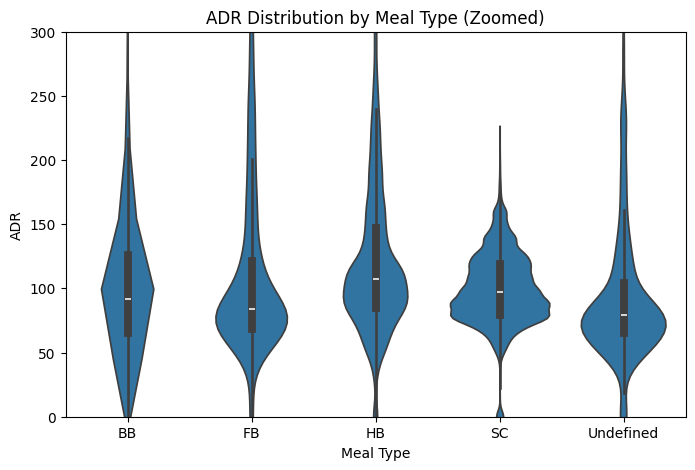

In [144]:
plt.figure(figsize=(8,5))
sns.violinplot(x='meal', y='adr', data=df)

plt.ylim(0, 300)   # zoom vùng ADR phổ biến
plt.title('ADR Distribution by Meal Type (Zoomed)')
plt.xlabel('Meal Type')
plt.ylabel('ADR')
plt.show()


In [77]:
df.groupby('reserved_room_type')[['adr', 'is_canceled']].mean()

,adr,is_canceled
reserved_room_type,,
A,90.990212,0.390742
B,92.168433,0.313466
C,160.560600,0.330425
D,120.925578,0.317489
E,125.268538,0.293186
F,167.936063,0.302787
G,174.228996,0.365987
H,187.967273,0.417832
L,119.600000,0.400000


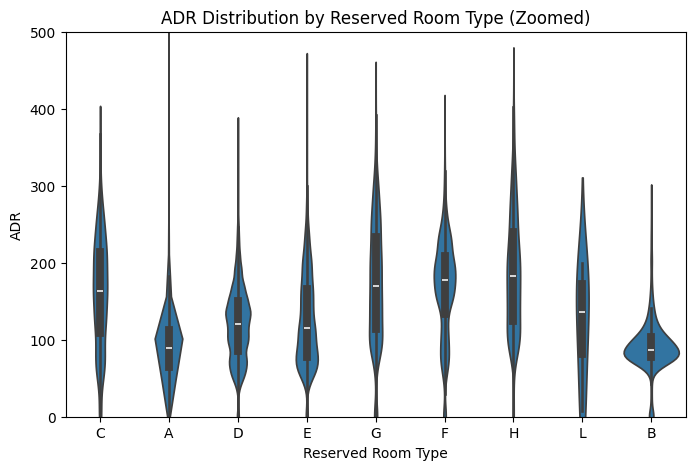

In [149]:
plt.figure(figsize=(8,5))
sns.violinplot(x='reserved_room_type', y='adr', data=df)

plt.ylim(0, 500)   # zoom vùng ADR phổ biến
plt.title('ADR Distribution by Reserved Room Type (Zoomed)')
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')
plt.show()


In [89]:
df.groupby('deposit_type')[['adr', 'is_canceled']].mean()

,adr,is_canceled
deposit_type,,
No Deposit,103.701254,0.282778
Non Refund,89.990741,0.993616
Refundable,76.010062,0.217391


In [68]:
df.groupby(['deposit_type','lead_time_bucket'])['is_canceled'].mean()

deposit_type  lead_time_bucket
No Deposit    0-30                0.172129
              30-90               0.321402
              90-180              0.348465
              180-365             0.382050
Non Refund    0-30                0.943089
              30-90               0.997922
              90-180              0.988935
              180-365             0.998930
Refundable    0-30                0.147059
              30-90               0.500000
              90-180              0.197802
              180-365             0.285714
Name: is_canceled, dtype: float64

#### **4. Yếu tố quy mô đặt phòng**

In [64]:
df.groupby('total_stay')['adr'].mean()

,adr
total_stay,
0,0.000000
1,94.650803
2,97.673998
3,105.087642
4,104.978363
5,113.311309
6,120.191511
7,103.520784
8,114.501487


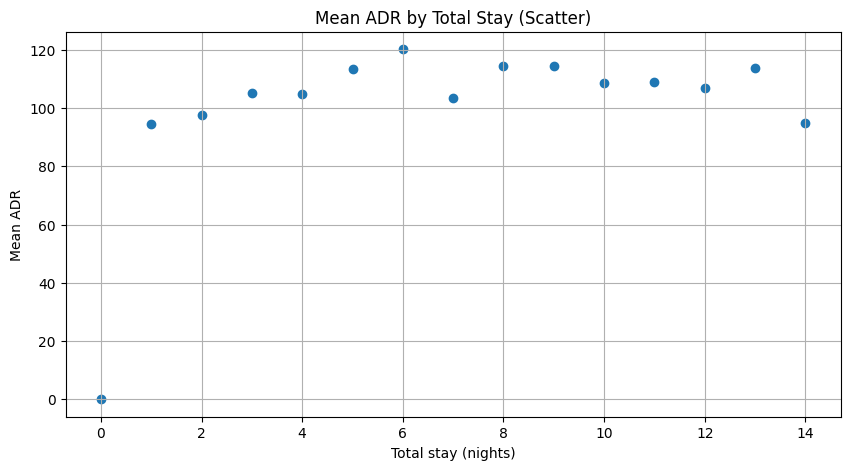

In [106]:
stay_adr = (
    df.groupby('total_stay')['adr']
      .mean()
      .reset_index()
      .sort_values('total_stay')
)

plt.figure(figsize=(10,5))
plt.scatter(stay_adr['total_stay'], stay_adr['adr'])

plt.title('Mean ADR by Total Stay (Scatter)')
plt.xlabel('Total stay (nights)')
plt.ylabel('Mean ADR')
plt.grid(True)
plt.show()


In [118]:
df.groupby('total_guests')[['adr', 'is_canceled']].mean()

,adr,is_canceled
total_guests,,
1.0,81.594808,0.288424
2.0,98.152227,0.396633
3.0,143.889087,0.321357
4.0,186.376674,0.420162
5.0,206.285147,0.279412


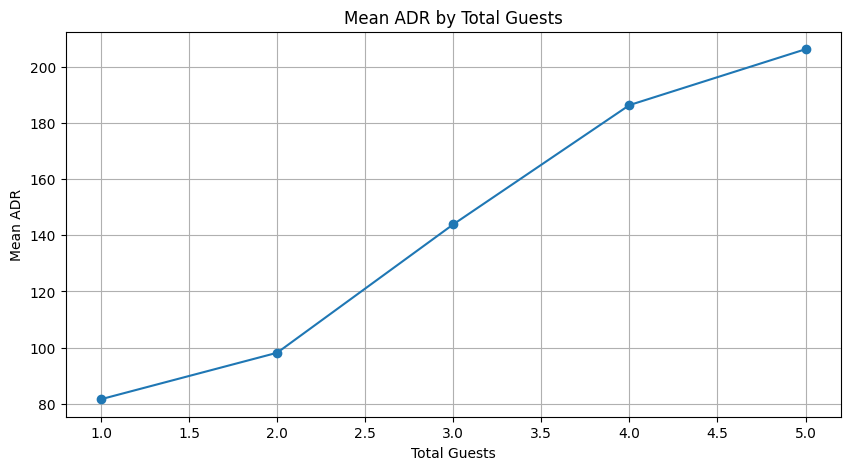

In [88]:
guest_adr = (
    df.groupby('total_guests')['adr']
      .mean()
      .reset_index()
      .sort_values('total_guests')
)

plt.figure(figsize=(10,5))
plt.plot(guest_adr['total_guests'], guest_adr['adr'], marker='o')

plt.title('Mean ADR by Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Mean ADR')
plt.grid(True)
plt.show()


#### **5. Tổng kết**

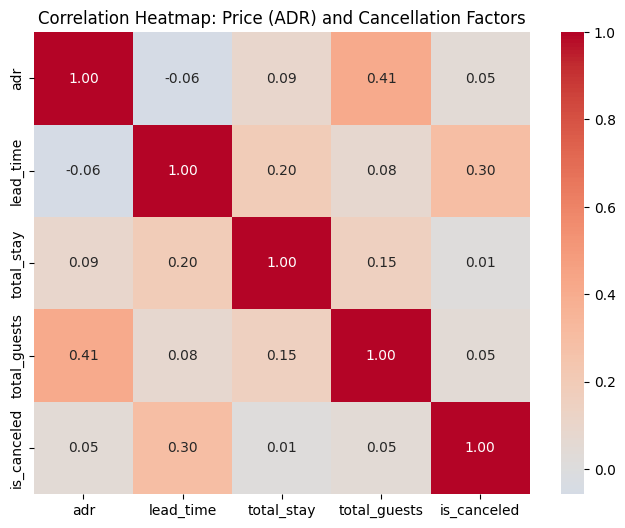

In [75]:
# Tính ma trận tương quan
corr_matrix = df[['adr','lead_time','total_stay','total_guests','is_canceled']].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)

plt.title('Correlation Heatmap: Price (ADR) and Cancellation Factors')
plt.show()


<a id="04"><h3><strong>4. Kết luận</strong></h3></a>


* Từ quá trình phân tích khám phá dữ liệu, có thể rút ra các nhận xét chính sau:
  * Dữ liệu có cấu trúc rõ ràng, tuy nhiên vẫn tồn tại giá trị thiếu và một số điểm bất thường (outliers), cho thấy dữ liệu thực tế chưa hoàn toàn “sạch” và cần được tiền xử lý trước khi phân tích sâu.
  * Phân bố của một số biến không tuân theo phân bố chuẩn, thể hiện sự lệch (skewness) và đuôi dài, điều này có thể ảnh hưởng đến các phương pháp phân tích và mô hình nhạy cảm với phân bố dữ liệu.
  * Các biểu đồ trực quan (histogram, boxplot, line chart) cho thấy mức độ biến động khác nhau giữa các giai đoạn, phản ánh sự không ổn định của dữ liệu theo thời gian.
  * Trong dữ liệu chuỗi thời gian, tồn tại xu hướng (trend) rõ rệt và dấu hiệu của tính mùa vụ, cho thấy các giá trị hiện tại chịu ảnh hưởng đáng kể từ các thời điểm trong quá khứ.
* Dựa trên các nhận xét thu được, có thể kết luận rằng:
  * Dữ liệu không mang tính ngẫu nhiên hoàn toàn mà chịu tác động của các quy luật nội tại, đặc biệt là các quy luật theo thời gian.
  * Việc thực hiện EDA là bước bắt buộc và cần thiết để hiểu bản chất dữ liệu, giảm rủi ro sai lệch và đưa ra các giả định đúng trước khi xây dựng mô hình.
  * Đối với dữ liệu chuỗi thời gian, việc nhận diện xu hướng và mùa vụ khẳng định rằng các mô hình có xét đến yếu tố thời gian sẽ phù hợp hơn so với các phương pháp phân tích tĩnh.
* Dựa trên các nhận xét thu được, có thể kết luận rằng:
  * Dữ liệu không mang tính ngẫu nhiên hoàn toàn mà chịu tác động của các quy luật nội tại, đặc biệt là các quy luật theo thời gian.
  * Việc thực hiện EDA là bước bắt buộc và cần thiết để hiểu bản chất dữ liệu, giảm rủi ro sai lệch và đưa ra các giả định đúng trước khi xây dựng mô hình.
  * Đối với dữ liệu chuỗi thời gian, việc nhận diện xu hướng và mùa vụ khẳng định rằng các mô hình có xét đến yếu tố thời gian sẽ phù hợp hơn so với các phương pháp phân tích tĩnh.